# EDA : ANÁLISIS DE ÁNIME

![../data/man_1](../data/man_1.jpg)

### 1. Introducción

- Este análisis se centra en el estudio de registros de ánimes, segun su genero y su rating.
- Exploraremos qué géneros y tipos destacan más según los usuarios y analizaremos las fechas de lanzamiento para identificar si los animes más destacados tienden a estrenarse en verano, otoño o invierno.


### 2. Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import unicodedata
import re
pd.set_option('display.max.column',None)

### 3. Carga de datos

In [2]:
df_1 = pd.read_csv('../data/anime.csv', encoding='utf-8', sep=",", quotechar='"', engine='python')

In [3]:
df_2=pd.read_csv('../data/MAL-anime.csv ', encoding='utf-8', index_col=0)

### 4. Análisis exploratorio de datos (EDA)

**4.1.Primera visualización del DataFrame (EDA)**

In [4]:
df_1


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [5]:
df_1.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
df_2

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55
2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44
...,...,...,...,...,...,...,...,...,...
12769,Neko no Ongaeshi,1090,Movie,1,Jul 2002 - Jul 2002,259386,https://myanimelist.net/anime/597/Neko_no_Onga...,https://cdn.myanimelist.net/r/100x140/images/a...,7.72
12770,Kowasugimasu.,12283,ONA,1,Mar 2018 - Mar 2018,352,https://myanimelist.net/anime/42014/Kowasugimasu,https://cdn.myanimelist.net/r/100x140/images/a...,4.80
12771,Bloody Date,12661,ONA,1,Nov 2006 - Nov 2006,4112,https://myanimelist.net/anime/11691/Bloody_Date,https://cdn.myanimelist.net/r/100x140/images/a...,4.21
12772,Deliver Police: Nishitokyo-shi Deliver Keisats...,11318,ONA,1,Mar 2021 - Mar 2021,485,https://myanimelist.net/anime/48575/Deliver_Po...,https://cdn.myanimelist.net/r/100x140/images/a...,5.34


In [7]:
df_2.isnull().sum()

Title        0
Rank         0
Type         0
Episodes     0
Aired        0
Members      0
page_url     0
image_url    0
Score        0
dtype: int64

In [8]:
tiene_simbolo = df_2.map(lambda x: '?' in str(x))
# Ver las celdas que contienen '?'
tiene_simbolo.sum()

Title          104
Rank             0
Type             0
Episodes        55
Aired            0
Members          0
page_url         0
image_url    12774
Score            0
dtype: int64

- Uniremos el df_1 con el df_2 utilizando el nombre como clave para obtener las fechas de estreno.
- Somos conscientes de que esto puede resultar en pérdida de datos; por ello, conservaremos las versiones originales de df_1 y df_2.

In [9]:
# Función para normalizar las cadenas: convertir a minúsculas, eliminar tildes y caracteres especiales
def normalizar_texto(texto):
    
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar tildes(acentos)
    texto = ''.join((c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn'))

        # Eliminar caracteres especiales como '/', '-', ';', ':', '#', '°', paréntesis y corchetes
    texto = re.sub(r'[-/;:#°!?+.☆♡(){}\[\]]', '', texto)
    
    # Eliminar múltiples espacios en blanco
    texto = re.sub(r'\s+', ' ', texto).strip()

     # Eliminar todos los espacios
    texto = texto.replace(' ', '')
    
    return texto

In [10]:
# Normalizar las columnas 'nombre' de ambos DataFrames
df_1['nombre_normalizado'] = df_1['name'].apply(normalizar_texto)
df_2['nombre_normalizado'] = df_2['Title'].apply(normalizar_texto)


In [11]:
df_1.head(2)

,anime_id,name,genre,type,episodes,rating,members,nombre_normalizado
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,kiminonawa
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,fullmetalalchemistbrotherhood


In [12]:
df_2.head(2)

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score,nombre_normalizado
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55,netjuunosusume
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55,neongenesisevangeliontheendofevangelion


In [13]:
df_unido = pd.merge(df_1, df_2, left_on='nombre_normalizado', right_on='nombre_normalizado', how='inner')

In [14]:
df_unido

,anime_id,name,genre,type,episodes,rating,members,nombre_normalizado,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,kiminonawa,Kimi no Na wa.,27,Movie,1,Aug 2016 - Aug 2016,2608836,https://myanimelist.net/anime/32281/Kimi_no_Na_wa,https://cdn.myanimelist.net/r/100x140/images/a...,8.85
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,fullmetalalchemistbrotherhood,Fullmetal Alchemist: Brotherhood,1,TV,64,Apr 2009 - Jul 2010,3188280,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/r/100x140/images/a...,9.10
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,gintama,Gintama°,4,TV,51,Apr 2015 - Mar 2016,598624,https://myanimelist.net/anime/28977/Gintama°,https://cdn.myanimelist.net/r/100x140/images/a...,9.06
3,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,gintama,Gintama,15,TV,201,Apr 2006 - Mar 2010,1026339,https://myanimelist.net/anime/918/Gintama,https://cdn.myanimelist.net/r/100x140/images/a...,8.94
4,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,gintama,Gintama.,14,TV,12,Jan 2017 - Mar 2017,299124,https://myanimelist.net/anime/34096/Gintama,https://cdn.myanimelist.net/r/100x140/images/a...,8.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7998,2592,Kimera,"Action, Horror, Sci-Fi, Supernatural, Vampire,...",OVA,1,5.29,3374,kimera,Kimera,11880,OVA,1,Jul 1996 - Jul 1996,7769,https://myanimelist.net/anime/2592/Kimera,https://cdn.myanimelist.net/r/100x140/images/a...,5.09
7999,730,Houkago no Shokuinshitsu,"Drama, Romance, Yaoi",OVA,2,5.23,4550,houkagonoshokuinshitsu,Houkago no Shokuinshitsu,11962,OVA,2,Apr 1994 - Jan 1995,7604,https://myanimelist.net/anime/730/Houkago_no_S...,https://cdn.myanimelist.net/r/100x140/images/a...,5.04
8000,30663,Docchi mo Maid,"Action, Comedy, Ecchi, Yuri",ONA,1,5.15,223,docchimomaid,Docchi mo Maid,12700,ONA,1,2004 - 2004,2386,https://myanimelist.net/anime/30663/Docchi_mo_...,https://cdn.myanimelist.net/r/100x140/images/a...,4.00
8001,34382,Citrus,"Drama, Romance, School, Yuri",NaN,Unknown,NaN,2459,citrus,Citrus,6632,TV,12,Jan 2018 - Mar 2018,497244,https://myanimelist.net/anime/34382/Citrus,https://cdn.myanimelist.net/r/100x140/images/a...,6.45


- La unión de los DataFrames se realizó utilizando la columna normalizada, ya que se implementaron mejoras significativas en su procesamiento al eliminar mayúsculas y caracteres especiales como -, /, ;, :, #, °, !?, +, ., ☆, ♡, (), {}, [],espacio, entre otros. Sin embargo, sería recomendable revisar el DataFrame en busca de otros posibles caracteres extraños que puedan estar afectando la unión. Esto podría explicar la reducción en el número de filas tras combinar ambos DataFrames.

- Se optó por realizar la unión con el parámetro how='inner', ya que, al utilizar how='outer', se generaban 17,168 filas con un promedio de 5,000 valores NaN por columna. La finalidad de combinar ambos DataFrames es facilitar y mejorar el análisis de datos. Por este motivo, se eligió el método de unión que mejor se adapta al tratamiento de la información y garantiza la calidad de los resultados obtenidos.

**4.2.Estructura del DataFrame**

- A partir de este momento, trabajaremos exclusivamente con el DataFrame df_union a excepcion de algunos casos.

In [15]:
df_unido.shape

(8003, 17)

**4.3.Espacio en memoria utilizado.**

In [16]:
df_unido.memory_usage(deep=True).sum()

np.int64(7725388)

- np.int64 es un tipo de datos de 64 bits, lo que significa que ocupa 8 bytes por valor.

**4.4.Verificar si hay jerarquías o estructuras anidadas**

- Se sospecha que las columnas 'genre' y 'Aired' podrían ser algunas de las que contienen estructuras anidadas.

In [17]:
# Verificar si alguna celda de 'genre' tiene géneros separados por comas
df_unido['genre'].apply(lambda x: isinstance(x, str) and ',' in x).sum()

np.int64(6822)

In [18]:
# Verificar si alguna celda de 'genre' tiene géneros separados por comas
df_unido['Aired'].apply(lambda x: isinstance(x, str) and '-' in x).sum()

np.int64(8003)

- Efectivamente, las columnas 'genre' y 'Aired' presentan jerarquías o estructuras anidadas. Será necesario realizar un análisis más detallado de estas dos columnas para determinar si es conveniente separarlas o mantener los valores tal como están.

**4.5.Clasificación de variables y revisión de valores faltantes**

In [19]:
df_unido.info

<bound method DataFrame.info of       anime_id                              name  \
0        32281                    Kimi no Na wa.   
1         5114  Fullmetal Alchemist: Brotherhood   
2        28977                          Gintama°   
3        28977                          Gintama°   
4        28977                          Gintama°   
...        ...                               ...   
7998      2592                            Kimera   
7999       730          Houkago no Shokuinshitsu   
8000     30663                    Docchi mo Maid   
8001     34382                            Citrus   
8002     33654                Hitorijime My Hero   

                                                  genre   type episodes  \
0                  Drama, Romance, School, Supernatural  Movie        1   
1     Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2     Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3     Action, Comedy, Historical, Parody, S

In [20]:
df_unido.isnull().sum()

anime_id                0
name                    0
genre                  41
type                   12
episodes                0
rating                132
members                 0
nombre_normalizado      0
Title                   0
Rank                    0
Type                    0
Episodes                0
Aired                   0
Members                 0
page_url                0
image_url               0
Score                   0
dtype: int64

In [21]:
df_unido[df_unido.isnull().any(axis=1)]

,anime_id,name,genre,type,episodes,rating,members,nombre_normalizado,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
2473,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604,isinfinitestratos2infinitewedding,IS: Infinite Stratos 2 - Infinite Wedding,7095,Special,1,Jun 2016 - Jun 2016,32468,https://myanimelist.net/anime/33242/IS__Infini...,https://cdn.myanimelist.net/r/100x140/images/a...,6.37
3068,33589,ViVid Strike!,NaN,TV,12,6.96,12345,vividstrike,ViVid Strike!,3962,TV,12,Oct 2016 - Dec 2016,84113,https://myanimelist.net/anime/33589/ViVid_Strike,https://cdn.myanimelist.net/r/100x140/images/a...,7.01
5207,29765,Metropolis (2009),NaN,Movie,1,6.27,313,metropolis2009,Metropolis (2009),10673,Movie,1,2009 - 2009,1057,https://myanimelist.net/anime/29765/Metropolis...,https://cdn.myanimelist.net/r/100x140/images/a...,5.55
6006,33187,Katsudou Shashin,NaN,Movie,1,5.79,607,katsudoushashin,Katsudou Shashin,10962,Movie,1,-,7595,https://myanimelist.net/anime/33187/Katsudou_S...,https://cdn.myanimelist.net/r/100x140/images/a...,5.46
6143,30862,Yubi wo Nusunda Onna,NaN,Movie,1,5.65,223,yubiwonusundaonna,Yubi wo Nusunda Onna,10030,Movie,1,2010 - 2010,2160,https://myanimelist.net/anime/30862/Yubi_wo_Nu...,https://cdn.myanimelist.net/r/100x140/images/a...,5.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7984,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593,yuukiyuunawayuushadearuwashiosuminoshou,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,1139,TV,6,Oct 2017 - Nov 2017,43308,https://myanimelist.net/anime/34284/Yuuki_Yuun...,https://cdn.myanimelist.net/r/100x140/images/a...,7.70
7985,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,4439,yuukiyuunawayuushadearuyuushanoshou,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,1199,TV,6,Nov 2017 - Jan 2018,40175,https://myanimelist.net/anime/34445/Yuuki_Yuun...,https://cdn.myanimelist.net/r/100x140/images/a...,7.68
7986,33390,Zunda Horizon,NaN,Movie,1,NaN,160,zundahorizon,Zunda Horizon,11117,Movie,1,Mar 2017 - Mar 2017,1836,https://myanimelist.net/anime/33390/Zunda_Horizon,https://cdn.myanimelist.net/r/100x140/images/a...,5.41
8001,34382,Citrus,"Drama, Romance, School, Yuri",NaN,Unknown,NaN,2459,citrus,Citrus,6632,TV,12,Jan 2018 - Mar 2018,497244,https://myanimelist.net/anime/34382/Citrus,https://cdn.myanimelist.net/r/100x140/images/a...,6.45


### Conclusiones : 

  - Popularidad según calificaciones y miembros:

Las calificaciones más altas (por ejemplo, 9.37, 9.26) corresponden a títulos populares con grandes cantidades de miembros (más de 2 millones). Esto indica una correlación entre la popularidad y la calificación.

  - Relación con fechas de emisión:

Las fechas de emisión (Aired) están disponibles en un rango que abarca décadas. Esto permite explorar cómo la época de estreno puede influir en el éxito de un anime.

  - Información duplicada o redundante:

Columnas como Title/name, episodes/Episodes y Type/type parecen contener datos similares, lo que podría revisarse para evitar redundancia.

  - Datos faltantes:

Algunas entradas tienen valores NaN o Unknown  en columnas como rating y episodes. Esto sugiere la necesidad de manejar valores faltantes para evitar problemas en el análisis.

  - Posibles áreas de análisis:

1. Identificar tendencias en géneros más calificados o con mayor cantidad de miembros.
2. Examinar la distribución de animes destacados por temporada o año de estreno.
3. Evaluar cómo diferentes tipos de animes (TV, Movie, OVA, ONA) se distribuyen en cuanto a calificaciones y popularidad.

**4.4.Revisión de duplicados**

In [22]:
df_unido.duplicated().sum()

np.int64(0)

In [23]:
df_unido[df_unido.duplicated(keep=False)]

,anime_id,name,genre,type,episodes,rating,members,nombre_normalizado,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score


In [24]:
df_unido[df_unido['nombre_normalizado'].duplicated(keep=False)]

,anime_id,name,genre,type,episodes,rating,members,nombre_normalizado,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,gintama,Gintama°,4,TV,51,Apr 2015 - Mar 2016,598624,https://myanimelist.net/anime/28977/Gintama°,https://cdn.myanimelist.net/r/100x140/images/a...,9.06
3,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,gintama,Gintama,15,TV,201,Apr 2006 - Mar 2010,1026339,https://myanimelist.net/anime/918/Gintama,https://cdn.myanimelist.net/r/100x140/images/a...,8.94
4,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,gintama,Gintama.,14,TV,12,Jan 2017 - Mar 2017,299124,https://myanimelist.net/anime/34096/Gintama,https://cdn.myanimelist.net/r/100x140/images/a...,8.98
11,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376,gintama,Gintama°,4,TV,51,Apr 2015 - Mar 2016,598624,https://myanimelist.net/anime/28977/Gintama°,https://cdn.myanimelist.net/r/100x140/images/a...,9.06
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376,gintama,Gintama,15,TV,201,Apr 2006 - Mar 2010,1026339,https://myanimelist.net/anime/918/Gintama,https://cdn.myanimelist.net/r/100x140/images/a...,8.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,22399,Saru Kani Gassen,Kids,OVA,1,5.23,62,sarukanigassen,Saru Kani Gassen,12122,Movie,1,-,472,https://myanimelist.net/anime/30059/Saru_Kani_...,https://cdn.myanimelist.net/r/100x140/images/a...,4.93
7609,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76,sarukanigassen,Saru Kani Gassen,12122,Movie,1,-,472,https://myanimelist.net/anime/30059/Saru_Kani_...,https://cdn.myanimelist.net/r/100x140/images/a...,4.93
7628,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114,shiwangelengxiaohua,Shi Wan Ge Leng Xiaohua,8095,ONA,12,Jul 2012 - Aug 2013,796,https://myanimelist.net/anime/33193/Shi_Wan_Ge...,https://cdn.myanimelist.net/r/100x140/images/a...,6.16
7629,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110,shiwangelengxiaohua,Shi Wan Ge Leng Xiaohua,8095,ONA,12,Jul 2012 - Aug 2013,796,https://myanimelist.net/anime/33193/Shi_Wan_Ge...,https://cdn.myanimelist.net/r/100x140/images/a...,6.16


- Se observa que la columna `nombre_normalizado` tiene animes repetidos. Habra que eliminar los animes repetidos.

In [25]:
(df_unido['type'] == df_unido['Type']).sum()

np.int64(7865)

In [26]:
(df_unido['episodes'] == df_unido['Episodes']).sum()

np.int64(7693)

In [27]:
df_unido['episodes'].value_counts().get('Unknown', 0)

np.int64(166)

In [28]:
(df_unido == 'Unknown').sum()

anime_id                0
name                    0
genre                   0
type                    0
episodes              166
rating                  0
members                 0
nombre_normalizado      0
Title                   0
Rank                    0
Type                    1
Episodes                0
Aired                   0
Members                 0
page_url                0
image_url               0
Score                   0
dtype: int64

In [29]:
df_unido['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [30]:
df_unido['Type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'ONA', 'Unknown'], dtype=object)

In [31]:
df_1['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

- Parece que la columna `genero`contiene una lista de cadenas en cada fila, habra que tratarla si es necesario mas adelante, 

In [32]:
df_unido['episodes'].dtype

dtype('O')

- Parece que la columna `episodes`es del tipo String.

In [33]:
# comprobamos si nuestra columna tiene algun otro valor distinto de int:

df_unido[~df_unido['episodes'].apply(lambda x: isinstance(x, int))]['episodes'].unique()


array(['1', '64', '51', '24', '10', '148', '110', '201', '25', '22', '75',
       '4', '26', '12', '27', '43', '13', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '14', '15', '203', '77', '8', '291', '6', '102', '96', '38',
       '79', '175', '103', '70', '153', '45', '21', '63', '52', '5',
       '145', '36', '69', '60', '114', '35', '61', '7', '34', '109', '20',
       '9', '49', '366', '97', '48', '78', '358', '155', '113', '54',
       '167', '161', '40', '142', '31', '220', '46', '195', '17', '1787',
       '73', '147', '127', '16', '19', '178', '150', '76', '53', '124',
       '29', '115', '224', '44', '58', '93', '92', '67', '172', '86',
       '42', '30', '276', '59', '72', '41', '105', '128', '137', '56',
       '104', '55', '65', '243', '193', '180', '91', '192', '66', '18',
       '182', '32', '164', '100', '296', '694', '95', '68', '117', '151',
       '130', '87', '170', '119', '84', '108', '28', '156', 

In [34]:
df_unido[~df_unido['Episodes'].apply(lambda x: isinstance(x, int))]['Episodes'].unique()

array(['1', '64', '51', '201', '12', '24', '10', '148', '110', '25', '22',
       '75', '4', '26', '27', '43', '11', '13', '74', '37', '2', '99',
       '?', '39', '101', '47', '50', '62', '33', '112', '23', '3', '94',
       '14', '15', '203', '77', '8', '291', '6', '102', '96', '38', '79',
       '175', '103', '70', '153', '45', '21', '63', '52', '5', '145',
       '36', '69', '60', '114', '35', '61', '7', '34', '109', '20', '9',
       '49', '366', '97', '48', '78', '500', '358', '155', '113', '67',
       '54', '167', '161', '40', '142', '31', '220', '195', '17', '1787',
       '73', '147', '127', '46', '16', '19', '178', '150', '76', '53',
       '124', '29', '115', '224', '44', '58', '93', '92', '172', '86',
       '42', '30', '276', '59', '131', '72', '41', '100', '105', '128',
       '137', '56', '104', '55', '65', '243', '193', '32', '180', '91',
       '192', '66', '18', '140', '182', '164', '296', '214', '694', '95',
       '68', '117', '151', '130', '87', '170', '119', '84'

- Parece que la columna `Episodes`es del tipo String. y contiene el signo ?,
habra que tratarlo.
- Tambien tenemos que confirmar si toda la columna es del tipo String.

In [35]:
(df_unido == '?').sum()

anime_id               0
name                   0
genre                  0
type                   0
episodes               0
rating                 0
members                0
nombre_normalizado     0
Title                  0
Rank                   0
Type                   0
Episodes              16
Aired                  0
Members                0
page_url               0
image_url              0
Score                  0
dtype: int64

- Se observan 16 `?` en la columna `Episodes`.

In [36]:
df_unido['Episodes'].map(type).unique()

array([<class 'str'>], dtype=object)

In [37]:
df_unido['episodes'].map(type).unique()

array([<class 'str'>], dtype=object)

- Parece ser solo del tipo String

In [38]:
df_unido[df_unido['Type']=='Unknown']

,anime_id,name,genre,type,episodes,rating,members,nombre_normalizado,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
7616,7398,Sekai Meisaku Douwa,Fantasy,OVA,20,6.49,207,sekaimeisakudouwa,Sekai Meisaku Douwa,8611,Unknown,20,Oct 1975 - Feb 1983,735,https://myanimelist.net/anime/7398/Sekai_Meisa...,https://cdn.myanimelist.net/r/100x140/images/a...,6.06


In [39]:
df_unido[(df_unido['Episodes']=='?') & (df_unido['episodes']!='Unknown')]

,anime_id,name,genre,type,episodes,rating,members,nombre_normalizado,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
2733,9874,Touhou Niji Sousaku Doujin Anime: Musou Kakyou,"Fantasy, Magic",OVA,2,7.07,18305,touhounijisousakudoujinanimemusoukakyou,Touhou Niji Sousaku Doujin Anime: Musou Kakyou,2621,OVA,?,Dec 2008 -,38585,https://myanimelist.net/anime/9874/Touhou_Niji...,https://cdn.myanimelist.net/r/100x140/images/a...,7.28
4142,30088,Ryoutei no Aji,Slice of Life,Special,4,6.63,538,ryouteinoaji,Ryoutei no Aji,5419,Special,?,Mar 2014 -,2219,https://myanimelist.net/anime/30088/Ryoutei_no...,https://cdn.myanimelist.net/r/100x140/images/a...,6.69


- Las columnas `type`/`Type` : Aunque no todas las filas son idénticas, esto se debe a que un anime puede ser categorizado de múltiples formas. En consecuencia, consideramos que estas dos columnas son equivalentes, por lo que eliminaremos una de ellas.

- Según el análisis previo, hemos identificado que la columna `type` presenta 12 valores `NaN`, mientras que la columna `Type` contiene un valor `Unknown` (anume_id :7398 y type: OVA) se rrellenara con la categorización que se le dio en la columna `type`.

- En cuanto a las columnas `Episodes`/`episodes`, aunque no todas las filas son idénticas, observamos que una de las columnas tiene más registros que la otra.

- El análisis realizado hasta el momento indica que la columna `episodes` tiene 166 valores `Unknown`, mientras que la columna `Episodes` tiene 16 valores `?` . En este momento podemos rellenar 2 de esos 16 valores con valor `?` segun la columna `episode`. anime_id: 9874 episodes: 2 ; anime_id: 30088 episodes: 4.

- Con base en este análisis, concluimos que es más eficiente conservar las columnas `Type` y `Episodes`, y eliminar las otras dos (`type` y `episodes`), debido a la mayor consistencia y relevancia de los datos en las primeras.

- Como se menciono anteriormente en la columna `nombre_normalizador` se deben eliminar las repeticiones.

- También es importante recordar que las columnas `name` y `Title` son equivalentes, al igual que la columna `nombre_normalizado`. Por el momento, eliminaremos la columna `name` y conservaremos `Title` y `nombre_normalizado`, ya que esta última puede resultar más útil en el análisis.

In [40]:
(df_unido == 'Unknown').sum()

anime_id                0
name                    0
genre                   0
type                    0
episodes              166
rating                  0
members                 0
nombre_normalizado      0
Title                   0
Rank                    0
Type                    1
Episodes                0
Aired                   0
Members                 0
page_url                0
image_url               0
Score                   0
dtype: int64

In [41]:
(df_unido == '?').sum()

anime_id               0
name                   0
genre                  0
type                   0
episodes               0
rating                 0
members                0
nombre_normalizado     0
Title                  0
Rank                   0
Type                   0
Episodes              16
Aired                  0
Members                0
page_url               0
image_url              0
Score                  0
dtype: int64

- Antes de eliminarlas comprobemos si podemos rellenar las filas faltantes de las columnas con las que nos queremos quedar.

In [42]:
df_unido[df_unido['Type']=='Unknown']

,anime_id,name,genre,type,episodes,rating,members,nombre_normalizado,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
7616,7398,Sekai Meisaku Douwa,Fantasy,OVA,20,6.49,207,sekaimeisakudouwa,Sekai Meisaku Douwa,8611,Unknown,20,Oct 1975 - Feb 1983,735,https://myanimelist.net/anime/7398/Sekai_Meisa...,https://cdn.myanimelist.net/r/100x140/images/a...,6.06


- Rellenamos la columna `Type` por OVA.

In [43]:
df_unido.loc[7616,'Type']= 'OVA'

In [44]:
(df_unido['Type'] == 'Unknown').sum()

np.int64(0)

In [45]:
df_unido[(df_unido['Episodes'] == '?') & (df_unido['episodes'] != 'Unknown')]

,anime_id,name,genre,type,episodes,rating,members,nombre_normalizado,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
2733,9874,Touhou Niji Sousaku Doujin Anime: Musou Kakyou,"Fantasy, Magic",OVA,2,7.07,18305,touhounijisousakudoujinanimemusoukakyou,Touhou Niji Sousaku Doujin Anime: Musou Kakyou,2621,OVA,?,Dec 2008 -,38585,https://myanimelist.net/anime/9874/Touhou_Niji...,https://cdn.myanimelist.net/r/100x140/images/a...,7.28
4142,30088,Ryoutei no Aji,Slice of Life,Special,4,6.63,538,ryouteinoaji,Ryoutei no Aji,5419,Special,?,Mar 2014 -,2219,https://myanimelist.net/anime/30088/Ryoutei_no...,https://cdn.myanimelist.net/r/100x140/images/a...,6.69


- Rellenamos las dos filas que podemos.

In [46]:
df_unido.loc[2733,'Episodes']= 2
df_unido.loc[4142,'Episodes']= 4

In [47]:
(df_unido['Episodes'] == '?').sum()

np.int64(14)

- Parece ser que se han rellenado correctamente.

**Eliminamos las columnas `type`, `episodes` y `name`.**
**Eliminaciones de las repeticiones de la columna `nombre_normalizador`**

In [48]:
df_unido.drop(['type', 'episodes','name'], axis=1, inplace=True)


- Eliminamos las repeticiones de la columna `nombre_normalizador`, nos quedamoremos con el mayor valor de las columnas `Episodes` y `Members` y el mayor numero entre las columnas (`Score` y `rating`).

In [49]:
# Primero, para asegurarnos de quedarnos con las filas con los valores más altos, agrupamos por 'nombre_normalizado'
# y seleccionamos la fila que tiene el mayor número de 'Episodes'
df_unido = df_unido.loc[df_unido.groupby('nombre_normalizado')['Episodes'].idxmax()]

# Luego, aseguramos que si hay duplicados, tomamos la fila con el mayor número de 'Members'
df_unido = df_unido.loc[df_unido.groupby('nombre_normalizado')['Members'].idxmax()]

# Ahora, seleccionamos la fila con el mayor valor entre las columnas 'Score' y 'rating'
df_unido['max_score'] = df_unido[['Score', 'rating']].max(axis=1)

# Finalmente, seleccionamos la fila con el valor más alto de 'max_score' para cada 'nombre_normalizado'
df_unido = df_unido.loc[df_unido.groupby('nombre_normalizado')['max_score'].idxmax()]

# Eliminamos la columna auxiliar 'max_score' ya que ya no es necesaria
df_unido = df_unido.drop(columns=['max_score'])

In [50]:
df_unido.head(2)

,anime_id,genre,rating,members,nombre_normalizado,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
6478,28761,Dementia,5.21,2386,0008,00:08,12164,Movie,1,Jun 2014 - Jun 2014,9749,https://myanimelist.net/anime/28761/00_08,https://cdn.myanimelist.net/r/100x140/images/a...,4.90
6778,29978,Comedy,4.00,916,001,001,12754,ONA,1,Feb 2013 - Feb 2013,15939,https://myanimelist.net/anime/29978/001,https://cdn.myanimelist.net/r/100x140/images/a...,3.35


- Los Titulos (00:08 y 001) son reales , no es un error.

In [51]:
df_unido['nombre_normalizado'].duplicated().any()

np.False_

In [52]:
df_unido[df_unido['nombre_normalizado'].duplicated(keep=False)]

,anime_id,genre,rating,members,nombre_normalizado,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score


**4.5.Resumen estadístico general del DataFrame**

In [53]:
df_unido.describe(exclude='object').round(2)

,anime_id,rating,members,Rank,Members,Score
count,7924.00,7792.00,7924.00,7924.00,7924.00,7924.00
mean,12255.25,6.64,25000.67,6475.58,72730.08,6.44
std,11063.23,0.98,65491.09,3690.56,231544.21,0.95
min,1.00,2.00,22.00,1.00,247.00,1.85
25%,2649.75,6.12,485.75,3302.75,1503.00,5.83
50%,8286.00,6.73,2691.50,6440.50,6353.00,6.50
75%,21409.00,7.32,17121.00,9628.25,37748.00,7.15
max,34525.00,9.50,1013917.00,12788.00,3759013.00,9.10


In [54]:
df_unido.describe(include='object')

,genre,nombre_normalizado,Title,Type,Episodes,Aired,page_url,image_url
count,7883,7924,7924,7924,7924,7924,7924,7924
unique,2744,7924,7924,5,175,2802,7924,7921
top,Comedy,◯,◯,TV,1,Oct 2016 - Dec 2016,https://myanimelist.net/anime/31687/◯,https://cdn.myanimelist.net/r/100x140/images/q...
freq,312,1,1,3088,3342,46,1,4


**Conclusiones**

En esta primera exploración observamos lo siguiente:



* `members`/`Members`: Alta dispersión (std = 66336.28/232530.51), indicando gran variación entre animes populares y menos conocidos.
* `Score`: La mayoría de los animes tienen puntuaciones entre 5.84 y 7.16 (rango intercuartil).
* El ranking y las puntuaciones parecen estár correlacionados (los animes mejor calificados tienden a tener mejor ranking).

* El género más común es "Comedy".Habra que volver a analizar este resultado una vez que tratemos la columna `genre`.

* El tipo más común de anime es "TV", y muchos tienen un solo episodio, lo que probablemente sean OVAs, películas o especiales.
* La base de datos está bien completada, con solo pequeños datos faltantes en genre.


* Ya vimos que las columnas `genre` y `Aired` presentan jerarquías o estructuras anidadas.

    - De `Aired` nos interesaria el mes y año de inicio. Por tanto se creara una nueva columna `fecha_ini`.
    
    - De `gener` nos interesa ver el top y la frecuencia de cada categoria, por tanto se dividira cada categoria por su `anime_id`.  

In [55]:
df_unido.shape

(7924, 14)

- Al eliminar duplicaciones nos hemos quedado con 7924 Filas.

**Creación de nueva columna `date_ini` y `season`**

In [56]:
df_unido['season'] = df_unido['Aired'].str.extract(r'(\w{3})')  # Primeras tres letras del mes

In [57]:
df_unido['date_ini'] = df_unido['Aired'].str.extract(r'(\d{4})')     # Primer año de cuatro dígitos

In [58]:
df_unido.isnull().sum()

anime_id                0
genre                  41
rating                132
members                 0
nombre_normalizado      0
Title                   0
Rank                    0
Type                    0
Episodes                0
Aired                   0
Members                 0
page_url                0
image_url               0
Score                   0
season                  4
date_ini                4
dtype: int64

- Se observa NaN en las nuevas columnas. Verifiquemos quienes son y si modemos tratar esos NaN.

In [59]:
df_unido[df_unido['season'].isnull()]

,anime_id,genre,rating,members,nombre_normalizado,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score,season,date_ini
6929,32237,"Comedy, Fantasy, Magic",5.00,37,burutabuchan,Burutabu-chan,11222,TV,?,-,276,https://myanimelist.net/anime/32237/Burutabu-chan,https://cdn.myanimelist.net/r/100x140/images/a...,5.37,NaN,NaN
6006,33187,NaN,5.79,607,katsudoushashin,Katsudou Shashin,10962,Movie,1,-,7595,https://myanimelist.net/anime/33187/Katsudou_S...,https://cdn.myanimelist.net/r/100x140/images/a...,5.46,NaN,NaN
7379,30298,"Magic, Shoujo",6.00,95,mahounoprincessminkymomoyumewodakishimetespecials,Mahou no Princess Minky Momo: Yume wo Dakishim...,8804,Special,3,-,708,https://myanimelist.net/anime/30298/Mahou_no_P...,https://cdn.myanimelist.net/r/100x140/images/a...,6.01,NaN,NaN
7608,22399,Kids,5.23,62,sarukanigassen,Saru Kani Gassen,12122,Movie,1,-,472,https://myanimelist.net/anime/30059/Saru_Kani_...,https://cdn.myanimelist.net/r/100x140/images/a...,4.93,NaN,NaN


- Son pocas columnas , las completaremos manualmente.

1. 6006: Katsudou Shashin: 
- Su fecha de realización oscila entre 1907 y 1911, aunque fue descubierta en Kioto en 2005. 
- Género : Anime:  
- pelicula de 3 segundos de duración. 
- No tenemos el mes 

In [60]:
df_unido.loc[6006, 'date_ini'] = 1907
df_unido.loc[6006,'genre'] = 'Anime' # creamos una nueva categoria.

2. 6929: Burutabu-chan: 
- Primera publicación	Junio de 2003
- Volúmenes	11

In [61]:
df_unido.loc[6929, 'date_ini'] = 2003
df_unido.loc[6929,'season'] = 'Jun' 
df_unido.loc[6929,'Episodes'] = '11'

3. 7379: Mahou no Princess Minky Momo: Yume wo Dakishim.. : 
- Primera publicación	marzo de 1982

In [62]:
df_unido.loc[7379, 'date_ini'] = 1982
df_unido.loc[7379,'season'] = 'Mar' 

4. 7608: Saru Kani Gassen: 
- Primera publicación : noviembre 2010

In [63]:
df_unido.loc[7608, 'date_ini'] = 2010
df_unido.loc[7608,'season'] = 'Nov' 

- Volvemos a comprobar los NaN.

In [64]:
df_unido.isnull().sum()

anime_id                0
genre                  40
rating                132
members                 0
nombre_normalizado      0
Title                   0
Rank                    0
Type                    0
Episodes                0
Aired                   0
Members                 0
page_url                0
image_url               0
Score                   0
season                  1
date_ini                0
dtype: int64

- Seguimos teniendo un NaN , Katsudou Shashin: ya que no es posible saber el mes de creacion. De momento lo dejaremos como esta.

- vamos a pasar la columna `data_ini` en un entero.

In [65]:
# Convertir 'date_ini' a entero 
df_unido['date_ini'] =  df_unido['date_ini'].astype(int)

In [66]:
df_unido.head(2)

,anime_id,genre,rating,members,nombre_normalizado,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score,season,date_ini
6478,28761,Dementia,5.21,2386,0008,00:08,12164,Movie,1,Jun 2014 - Jun 2014,9749,https://myanimelist.net/anime/28761/00_08,https://cdn.myanimelist.net/r/100x140/images/a...,4.90,Jun,2014
6778,29978,Comedy,4.00,916,001,001,12754,ONA,1,Feb 2013 - Feb 2013,15939,https://myanimelist.net/anime/29978/001,https://cdn.myanimelist.net/r/100x140/images/a...,3.35,Feb,2013


- Utilizar el tipo fecha (datetime) para la columna `date_ini` también puede ser una buena opción, especialmente si realizamos análisis temporales más avanzados en el futuro, como:

- Ordenar por fechas.
- Filtrar por rangos de tiempo (por ejemplo, "animes después de 2010").
- Realizar cálculos de diferencias entre fechas.

- Sin embargo, en este caso, dado que solo nos interesa analizar cuántos animes se han reproducido por año, el tipo entero (int) es suficiente y más directo.

**Vamos a reorganizar las columnas para que nos sea mas visible**

In [67]:
df_unido.columns

Index(['anime_id', 'genre', 'rating', 'members', 'nombre_normalizado', 'Title',
       'Rank', 'Type', 'Episodes', 'Aired', 'Members', 'page_url', 'image_url',
       'Score', 'season', 'date_ini'],
      dtype='object')

In [68]:
df_unido=df_unido[['anime_id','Title','nombre_normalizado','Type','genre','Episodes','rating','Score','Rank','members','Members','Aired','season', 'date_ini','page_url', 'image_url']]
df_unido.head(2)

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url
6478,28761,00:08,0008,Movie,Dementia,1,5.21,4.90,12164,2386,9749,Jun 2014 - Jun 2014,Jun,2014,https://myanimelist.net/anime/28761/00_08,https://cdn.myanimelist.net/r/100x140/images/a...
6778,29978,001,001,ONA,Comedy,1,4.00,3.35,12754,916,15939,Feb 2013 - Feb 2013,Feb,2013,https://myanimelist.net/anime/29978/001,https://cdn.myanimelist.net/r/100x140/images/a...


**Descripción general de los datos**

anime_id : ID único de myanimelist.net que identifica a un anime.

genre : Lista de géneros separados por comas para este anime.

rating : Calificación promedio de 10 para este anime, desde la pagina 'x'.

Score : Calificación promedio de 10 para este anime, desde la pagina 'y'.

members : Número de miembros que han visto/leído el anime, desde la  pagina 'x'.

Members : Número de miembros que han visto/leído el anime, desde la  pagina 'y'.

Title: Nombre del anime

nombre_normalizado : nombre del anime normalizado (sin simbolos ni mayusculas ni espacios)

Rank: Clasificación del anime

Type: tipos de anime como ejemplo: OVA , TV ,

Episodes (anime): Número de episodios del anime

Aired : Mes y años de inicio y final del anime 

season : mes en el que se ha iniciado el anime

date_ini : Año de creación del anime

page_url: El enlace URL a la página 'y' del anime en particular

image_url: El enlace URL a la imagen de portada del anime en particular, desde la pagina 'y'

**Separación de la da columna `gener`**

- Ya de habia comentado que la columna `genre` esta anidada, en realidad nos interesa saber que genero es cada anime, por ello necesitamos duplicar y separar cada anime con su genero.

- Para ello haremos un nuevo df_1_copia para no modificar la original.

In [69]:
df_1_copia=df_unido.copy()
# Reemplazar valores NaN por una lista vacía y luego dividir por ','
df_1_copia['genre']= df_unido['genre'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Ahora, explotar la columna para separar los géneros en filas individuales
df_1_copia= df_1_copia.explode('genre', ignore_index=True)

df_1_copia

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url
0,28761,00:08,0008,Movie,Dementia,1,5.21,4.90,12164,2386,9749,Jun 2014 - Jun 2014,Jun,2014,https://myanimelist.net/anime/28761/00_08,https://cdn.myanimelist.net/r/100x140/images/a...
1,29978,001,001,ONA,Comedy,1,4.00,3.35,12754,916,15939,Feb 2013 - Feb 2013,Feb,2013,https://myanimelist.net/anime/29978/001,https://cdn.myanimelist.net/r/100x140/images/a...
2,1583,009-1,0091,TV,Action,12,6.39,6.20,7892,11097,20629,Oct 2006 - Dec 2006,Oct,2006,https://myanimelist.net/anime/1583/009-1,https://cdn.myanimelist.net/r/100x140/images/a...
3,1583,009-1,0091,TV,Mecha,12,6.39,6.20,7892,11097,20629,Oct 2006 - Dec 2006,Oct,2006,https://myanimelist.net/anime/1583/009-1,https://cdn.myanimelist.net/r/100x140/images/a...
4,1583,009-1,0091,TV,Sci-Fi,12,6.39,6.20,7892,11097,20629,Oct 2006 - Dec 2006,Oct,2006,https://myanimelist.net/anime/1583/009-1,https://cdn.myanimelist.net/r/100x140/images/a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26331,20533,Z/X: Ignition,zxignition,TV,Fantasy,12,6.68,6.48,6532,24788,39881,Jan 2014 - Apr 2014,Jan,2014,https://myanimelist.net/anime/20533/Z_X__Ignition,https://cdn.myanimelist.net/r/100x140/images/a...
26332,20533,Z/X: Ignition,zxignition,TV,Game,12,6.68,6.48,6532,24788,39881,Jan 2014 - Apr 2014,Jan,2014,https://myanimelist.net/anime/20533/Z_X__Ignition,https://cdn.myanimelist.net/r/100x140/images/a...
26333,20533,Z/X: Ignition,zxignition,TV,Sci-Fi,12,6.68,6.48,6532,24788,39881,Jan 2014 - Apr 2014,Jan,2014,https://myanimelist.net/anime/20533/Z_X__Ignition,https://cdn.myanimelist.net/r/100x140/images/a...
26334,31687,◯,◯,ONA,Dementia,1,4.22,3.75,12723,448,2487,2010 - 2010,201,2010,https://myanimelist.net/anime/31687/◯,https://cdn.myanimelist.net/r/100x140/images/a...


In [70]:
df_1_copia['genre'].unique()

array(['Dementia', 'Comedy', 'Action', ' Mecha', ' Sci-Fi', ' Seinen',
       ' Adventure', ' Super Power', ' Demons', ' Fantasy', ' Magic',
       ' Military', ' Shoujo', 'Historical', 'Drama', 'Adventure',
       ' Drama', 'Demons', ' Romance', 'Sci-Fi', ' Ecchi',
       ' Supernatural', ' Mystery', ' Space', ' Harem', 'Kids', 'Romance',
       ' School', ' Shounen', 'Slice of Life', ' Comedy', ' Kids',
       'Ecchi', ' Parody', 'Mecha', ' Game', ' Slice of Life', 'Fantasy',
       ' Horror', ' Sports', 'Magic', 'Music', ' Historical', 'Harem',
       'Martial Arts', 'Seinen', ' Police', ' Dementia', ' Psychological',
       ' Thriller', ' Samurai', ' Martial Arts', ' Music', 'Shounen',
       'Sports', ' Shoujo Ai', 'Horror', 'School', 'Shoujo', ' Josei',
       'Psychological', nan, 'Cars', 'Mystery', ' Vampire', 'Game',
       ' Yuri', ' Shounen Ai', ' Cars', 'Hentai', 'Parody', 'Space',
       'Supernatural', 'Yaoi', ' Yaoi', ' Hentai', 'Anime', 'Thriller',
       'Samurai', 'Jo

- Se observan duplicaciones, como por ejemplo: 'Yaoi', ' Yaoi', por culpa de espacios.
- Vamos a eliminar esos espacios.

In [71]:
# Eliminar espacios al principio y al final de cada valor en la columna 'genre'
df_1_copia['genre'] = df_1_copia['genre'].str.strip()

In [72]:
df_1_copia['genre'].unique()

array(['Dementia', 'Comedy', 'Action', 'Mecha', 'Sci-Fi', 'Seinen',
       'Adventure', 'Super Power', 'Demons', 'Fantasy', 'Magic',
       'Military', 'Shoujo', 'Historical', 'Drama', 'Romance', 'Ecchi',
       'Supernatural', 'Mystery', 'Space', 'Harem', 'Kids', 'School',
       'Shounen', 'Slice of Life', 'Parody', 'Game', 'Horror', 'Sports',
       'Music', 'Martial Arts', 'Police', 'Psychological', 'Thriller',
       'Samurai', 'Shoujo Ai', 'Josei', nan, 'Cars', 'Vampire', 'Yuri',
       'Shounen Ai', 'Hentai', 'Yaoi', 'Anime'], dtype=object)

- Parece que ya no hay repeticiones.

- Ahora si podemos comprobar cual es el genero mas repetido.

In [73]:
df_1_copia['genre'].describe()

count      26296
unique        44
top       Comedy
freq        3478
Name: genre, dtype: object

In [74]:
df_unido['genre'].describe()

count       7884
unique      2745
top       Comedy
freq         312
Name: genre, dtype: object

- Parece ser que hay cambios en la columna `genre`, el numero de count es mas alto , ahora solo hay 44 unicos, y el numero de frecuencia ha aumentado , 3.478 veces Comedy , sera tb el mejor puntuado? o el mas visto?

In [75]:
# 1. Género con mejor puntuación promedio
mejor_puntuado = df_1_copia.groupby('genre')[['Score', 'rating']].mean()
mejor_puntuado = mejor_puntuado.sort_values(by='Score', ascending=False)  # O por 'rating', según prefieras

print("Género con la mejor puntuación promedio:")
print(mejor_puntuado.head(1))  # Muestra el género con la mejor puntuación

# 2. Género con más vistas (por el número de 'Members')
más_visto = df_1_copia.groupby('genre')['Members'].sum()
más_visto = más_visto.sort_values(ascending=False)

print("\nGénero con más vistas:")
print(más_visto.head(1))

Género con la mejor puntuación promedio:
          Score    rating
genre                    
Josei  7.335778  7.493488

Género con más vistas:
genre
Comedy    273806862
Name: Members, dtype: int64


**Conclusiones:**

- Aunque `Comedy` es el género con más miembros, `Josei` tiene la mejor puntuación promedio en cuanto a `Score` y `rating`. Esto puede sugerir que, aunque los animes de `Comedy` son más populares, los animes de `Josei` podrían ser más apreciados por quienes los ven.

- `Josei` : Historias que abirdan temas como romance, la vida cotidiana, el trabajo y la familia. Animes dirigido especialemnte a mujeres adultas.

**Cardinalidad**

El cálculo de este porcentaje es:

Cardinalidad% =(Número de valores únicos/Número total de filas)x100

In [76]:
cardinalidad = pd.DataFrame({
    'Columna': df_unido.columns,
    'Tipo_Variable':['Discreta' if x == 'int64' else 'Continua' if x=='float64' else 'Nominal' for x in df_unido.dtypes],
    'Cardinalidad%':[round((df_unido[col].nunique())/len(df_1)*100,2) for col in df_unido.columns]})

cardinalidad

,Columna,Tipo_Variable,Cardinalidad%
0,anime_id,Discreta,64.45
1,Title,Nominal,64.45
2,nombre_normalizado,Nominal,64.45
3,Type,Nominal,0.04
4,genre,Nominal,22.33
5,Episodes,Nominal,1.42
6,rating,Continua,4.58
7,Score,Continua,4.38
8,Rank,Discreta,64.45
9,members,Discreta,44.46


- `Continua`: Esto significa que los valores de la columna `continua` son numéricos y pueden tomar una cantidad infinita de valores dentro de un rango, lo que indica una variable continua.

- El número de calificaciones únicas representadas en el DataFrame del total de filas.

- `Discreta`:  Las columnas que son `Discretas` significa que son numeros enteros.

In [77]:
# Calcular la cardinalidad de la columna 'genre'
columna = 'genre'

# Número de valores únicos
num_unicos = df_1_copia[columna].nunique()

# Número total de filas (excluyendo NaN)
total_filas = len(df_1_copia)

# Calcular el porcentaje de cardinalidad
cardinalidad = round((num_unicos / total_filas) * 100, 2)

print(f"Cardinalidad de la columna '{columna}': {cardinalidad}%")

Cardinalidad de la columna 'genre': 0.17%


- Aproximadamente el 0.17% de esas filas tienen géneros únicos diferentes.

**Nos guardaremos el DataFrame `df_1_copia` , para futuras comprobaciones y graficas.**

### Rellenar los NaN faltantes de las columnas

**Observación:**

- Las columnas `Episodes`, `Score`, `Rank`, `members` y `members` contienen valores Nulos.

- 1. Vamos a  pasar los 'Unknown' y '?' a Nan

In [78]:
df_unido = df_unido.replace(['Unknown', '?'], np.nan)

In [79]:
df_unido.isnull().sum()

anime_id                0
Title                   0
nombre_normalizado      0
Type                    0
genre                  40
Episodes               13
rating                132
Score                   0
Rank                    0
members                 0
Members                 0
Aired                   0
season                  1
date_ini                0
page_url                0
image_url               0
dtype: int64

- 1. Nos centraremos en rellenar la columna `rating`.

In [80]:
df_unido['rating'].dtype

dtype('float64')

In [81]:
# Filtrar filas donde 'rating' es de tipo str
df_unido[df_unido['rating'].isna()]

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url
7880,29643,6HP (Six Hearts Princess),6hpsixheartsprincess,Special,Magic,NaN,NaN,5.92,9243,1687,5754,Dec 2016 -,Dec,2016,https://myanimelist.net/anime/29643/6HP_Six_He...,https://cdn.myanimelist.net/r/100x140/images/a...
7881,33337,ACCA: 13-ku Kansatsu-ka,acca13kukansatsuka,TV,"Drama, Police",12,NaN,7.66,1241,7403,158589,Jan 2017 - Mar 2017,Jan,2017,https://myanimelist.net/anime/33337/ACCA__13-k...,https://cdn.myanimelist.net/r/100x140/images/a...
7882,33839,Alice in Deadly School,aliceindeadlyschool,OVA,"Comedy, School, Shounen",1,NaN,5.17,11726,1648,19073,Mar 2021 - Mar 2021,Mar,2021,https://myanimelist.net/anime/33839/Alice_in_D...,https://cdn.myanimelist.net/r/100x140/images/a...
7883,34350,Alice to Zouroku,alicetozouroku,TV,"Adventure, Mystery, Seinen",12,NaN,7.10,3547,515,115582,Apr 2017 - Jun 2017,Apr,2017,https://myanimelist.net/anime/34350/Alice_to_Z...,https://cdn.myanimelist.net/r/100x140/images/a...
7863,33506,Ao no Exorcist: Kyoto Fujouou-hen,aonoexorcistkyotofujououhen,TV,"Action, Demons, Fantasy, Shounen, Supernatural",12,NaN,7.35,2281,45127,730281,Jan 2017 - Mar 2017,Jan,2017,https://myanimelist.net/anime/33506/Ao_no_Exor...,https://cdn.myanimelist.net/r/100x140/images/a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,31783,Yowamushi Pedal: New Generation,yowamushipedalnewgeneration,TV,"Comedy, Drama, Shounen, Sports",25,NaN,7.64,1275,9037,78008,Jan 2017 - Jun 2017,Jan,2017,https://myanimelist.net/anime/31783/Yowamushi_...,https://cdn.myanimelist.net/r/100x140/images/a...
7984,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,yuukiyuunawayuushadearuwashiosuminoshou,TV,"Drama, Fantasy, Magic, Slice of Life",6,NaN,7.70,1139,2593,43308,Oct 2017 - Nov 2017,Oct,2017,https://myanimelist.net/anime/34284/Yuuki_Yuun...,https://cdn.myanimelist.net/r/100x140/images/a...
7985,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,yuukiyuunawayuushadearuyuushanoshou,TV,"Drama, Fantasy, Magic, Slice of Life",6,NaN,7.68,1199,4439,40175,Nov 2017 - Jan 2018,Nov,2017,https://myanimelist.net/anime/34445/Yuuki_Yuun...,https://cdn.myanimelist.net/r/100x140/images/a...
7878,34176,Zero kara Hajimeru Mahou no Sho,zerokarahajimerumahounosho,TV,"Action, Fantasy",12,NaN,7.07,3673,7716,261499,Apr 2017 - Jun 2017,Apr,2017,https://myanimelist.net/anime/34176/Zero_kara_...,https://cdn.myanimelist.net/r/100x140/images/a...


- tenemos 132 NaN , veamos de que manera podemos rellenarlos.

- 1. podemos rellenarlos con la misma calificacion de la columna `Score`.
- 2. podemos rellenarlos con la media de la columna `members` y agrupandolo por la  columna `Type`. Aunque este tipo de rellenado nos puede dar problemas si los datos estan sesgados.
- 3. Dividir los datos por cuartiles segun los  `members`

- La opción 1 la descatamos ya que hablamos de numero distintos de visitantes, ya que hablamos de la pagina 'x' que recojimos los datos.

- Veamos la opcion numero 2.

In [82]:
df_unido.columns

Index(['anime_id', 'Title', 'nombre_normalizado', 'Type', 'genre', 'Episodes',
       'rating', 'Score', 'Rank', 'members', 'Members', 'Aired', 'season',
       'date_ini', 'page_url', 'image_url'],
      dtype='object')

In [83]:
# Rellenar valores faltantes en 'rating'
# Agrupamos por 'type' y calculamos la media ponderada de 'rating' (usando 'members' como peso)
rating_mean = (
    df_unido.groupby('Type')
    .apply(lambda x: np.average(
        x['rating'].dropna(),
        weights=x.loc[x['rating'].notna(), 'members'].dropna()
    ) if len(x['rating'].dropna()) > 0 else np.nan)
)
# Rellenar los NaN en 'rating' con la media ponderada según el grupo 'type'
df_2_copia=df_unido
df_2_copia['rating'] = df_2_copia.apply(
    lambda row: rating_mean[row['Type']] if pd.isna(row['rating']) else row['rating'],
    axis=1
)

C:\Users\denis\AppData\Local\Temp\ipykernel_8488\268585173.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.average(


- Comprobemos algunas filas:

In [84]:
df_2_copia[df_2_copia['anime_id']==34502] 

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url
7212,34502,Inazma Delivery,inazmadelivery,TV,"Action, Comedy, Sci-Fi",10,7.752721,6.25,7697,32,1235,Dec 2016 - Feb 2017,Dec,2016,https://myanimelist.net/anime/34502/Inazma_Del...,https://cdn.myanimelist.net/r/100x140/images/a...


In [85]:
df_2_copia[df_2_copia['anime_id']==33390] 

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url
7986,33390,Zunda Horizon,zundahorizon,Movie,NaN,1,7.876633,5.41,11117,160,1836,Mar 2017 - Mar 2017,Mar,2017,https://myanimelist.net/anime/33390/Zunda_Horizon,https://cdn.myanimelist.net/r/100x140/images/a...


- Parece un poco sesgado.

- Comprobemos la tercera opción.

Proceso:

Dividir los datos en `cuartiles` según members.

Calcular el valor más frecuente (o algún estadístico relevante) de `Type` dentro de cada cuartil.

Rellenar los valores NaN en `rating` basándote en el cuartil en el que se encuentra members.

In [86]:
# Crear una nueva columna para clasificar los valores de 'members' en cuartiles
df_3_copia=df_unido
df_3_copia['members_cuartil'] = pd.qcut(df_3_copia['members'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Calcular la mediana de 'rating' para cada combinación de cuartil y 'type'
rating_median_by_group = (
    df_3_copia.groupby(['members_cuartil', 'Type'])['rating']
    .median()
    .reset_index()
    .rename(columns={'rating': 'median_rating'})
)

# Unir las medianas calculadas al DataFrame original
df_3_copia = df_3_copia.merge(rating_median_by_group, on=['members_cuartil', 'Type'], how='left')

# Rellenar los valores NaN en 'rating' con la mediana calculada
df_3_copia['rating'] = df_3_copia['rating'].fillna(df_3_copia['median_rating'])

# Eliminar la columna auxiliar 'median_rating' (opcional)
df_3_copia.drop(columns=['median_rating'], inplace=True)

# Verificar si quedan NaN en 'rating'
df_3_copia['rating'].isnull().sum()

C:\Users\denis\AppData\Local\Temp\ipykernel_8488\939392878.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_3_copia.groupby(['members_cuartil', 'Type'])['rating']


np.int64(0)

- No parece que haya mas NaN.

- vamos a comprobar varios id:

In [87]:
df_3_copia[df_3_copia['anime_id']==34502] 

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url,members_cuartil
3055,34502,Inazma Delivery,inazmadelivery,TV,"Action, Comedy, Sci-Fi",10,7.752721,6.25,7697,32,1235,Dec 2016 - Feb 2017,Dec,2016,https://myanimelist.net/anime/34502/Inazma_Del...,https://cdn.myanimelist.net/r/100x140/images/a...,Q1


In [88]:
df_3_copia[df_3_copia['anime_id']==33390] 

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url,members_cuartil
7920,33390,Zunda Horizon,zundahorizon,Movie,NaN,1,7.876633,5.41,11117,160,1836,Mar 2017 - Mar 2017,Mar,2017,https://myanimelist.net/anime/33390/Zunda_Horizon,https://cdn.myanimelist.net/r/100x140/images/a...,Q1


In [89]:
df_3_copia[df_3_copia['anime_id']==33839] 

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url,members_cuartil
230,33839,Alice in Deadly School,aliceindeadlyschool,OVA,"Comedy, School, Shounen",1,7.34686,5.17,11726,1648,19073,Mar 2021 - Mar 2021,Mar,2021,https://myanimelist.net/anime/33839/Alice_in_D...,https://cdn.myanimelist.net/r/100x140/images/a...,Q2


In [90]:
df_3_copia[df_3_copia['anime_id']==29643] 

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url,members_cuartil
46,29643,6HP (Six Hearts Princess),6hpsixheartsprincess,Special,Magic,NaN,7.33508,5.92,9243,1687,5754,Dec 2016 -,Dec,2016,https://myanimelist.net/anime/29643/6HP_Six_He...,https://cdn.myanimelist.net/r/100x140/images/a...,Q2


- Nos quedamos con la 3ª opcion, ya que haciendo la mediana o media puede haber sesgo. 

In [91]:
df_unido=df_3_copia

In [92]:
df_unido.isnull().sum()

anime_id               0
Title                  0
nombre_normalizado     0
Type                   0
genre                 40
Episodes              13
rating                 0
Score                  0
Rank                   0
members                0
Members                0
Aired                  0
season                 1
date_ini               0
page_url               0
image_url              0
members_cuartil        0
dtype: int64

- Aun seguimos teniendo algunos NaN , optamos por eliminar dichas filas ya que nos es imposible rellenar esos campos.

- primero comprobemos quienes son esas filas y si hay alguna relevancia en ellas

In [93]:
# Filtrar filas donde la columna 'Episodes' tiene NaN
df_unido[df_unido['Episodes'].isna()]



,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url,members_cuartil
46,29643,6HP (Six Hearts Princess),6hpsixheartsprincess,Special,Magic,NaN,7.33508,5.92,9243,1687,5754,Dec 2016 -,Dec,2016,https://myanimelist.net/anime/29643/6HP_Six_He...,https://cdn.myanimelist.net/r/100x140/images/a...,Q2
978,6149,Chibi Maruko-chan (1995),chibimarukochan1995,TV,"Comedy, Kids, School, Slice of Life",NaN,7.37000,7.26,2732,1113,5295,Jan 1995 -,Jan,1995,https://myanimelist.net/anime/6149/Chibi_Maruk...,https://cdn.myanimelist.net/r/100x140/images/a...,Q2
1224,966,Crayon Shin-chan,crayonshinchan,TV,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",NaN,7.73000,7.78,965,26267,80088,Apr 1992 -,Apr,1992,https://myanimelist.net/anime/966/Crayon_Shin-...,https://cdn.myanimelist.net/r/100x140/images/a...,Q4
1400,235,Detective Conan,detectiveconan,TV,"Adventure, Comedy, Mystery, Police, Shounen",NaN,8.25000,8.17,379,114702,335827,Jan 1996 -,Jan,1996,https://myanimelist.net/anime/235/Detective_Conan,https://cdn.myanimelist.net/r/100x140/images/a...,Q4
1552,8687,Doraemon (2005),doraemon2005,TV,"Comedy, Kids, Sci-Fi, Shounen",NaN,7.59000,7.65,1256,2980,18608,Apr 2005 -,Apr,2005,https://myanimelist.net/anime/8687/Doraemon_2005,https://cdn.myanimelist.net/r/100x140/images/a...,Q3
2393,23539,Gudetama,gudetama,TV,"Comedy, Kids",NaN,7.36000,7.03,3906,2348,12322,Mar 2014 -,Mar,2014,https://myanimelist.net/anime/23539/Gudetama,https://cdn.myanimelist.net/r/100x140/images/a...,Q2
2540,8336,Hanakappa,hanakappa,TV,"Comedy, Kids",NaN,5.42000,5.89,9383,185,851,Mar 2010 -,Mar,2010,https://myanimelist.net/anime/8336/Hanakappa,https://cdn.myanimelist.net/r/100x140/images/a...,Q1
3702,7505,Knyacki!,knyacki,TV,"Comedy, Drama, Fantasy, Kids",NaN,6.38000,6.12,8297,242,1020,Apr 1995 -,Apr,1995,https://myanimelist.net/anime/7505/Knyacki,https://cdn.myanimelist.net/r/100x140/images/a...,Q1
5008,1199,Nintama Rantarou,nintamarantarou,TV,"Comedy, Shounen",NaN,7.18000,7.08,3653,2255,7212,Apr 1993 -,Apr,1993,https://myanimelist.net/anime/1199/Nintama_Ran...,https://cdn.myanimelist.net/r/100x140/images/a...,Q2
5132,4459,Ojarumaru,ojarumaru,TV,"Adventure, Comedy, Fantasy",NaN,6.48000,6.32,7327,515,1904,Oct 1998 -,Oct,1998,https://myanimelist.net/anime/4459/Ojarumaru,https://cdn.myanimelist.net/r/100x140/images/a...,Q2


- Parece que estas repartidos por los cuarto cuartiles y hay varios del cuartil 4 que nos interesa. 
- Vamos a rellenearlos manualmente. 

In [94]:
df_unido.loc[46	,'Episodes']= 15
df_unido.loc[978,'Episodes']= 1400
df_unido.loc[1224,'Episodes']= 907
df_unido.loc[1400,'Episodes']= 1100
df_unido.loc[1552,'Episodes']= 1787
df_unido.loc[2393,'Episodes']= 10
df_unido.loc[2540,'Episodes']= 100
df_unido.loc[3702,'Episodes']= 49
df_unido.loc[5008,'Episodes']= 1300
df_unido.loc[5132,'Episodes']= 1947
df_unido.loc[5172,'Episodes']= 1122
df_unido.loc[6001,'Episodes']= 8100
df_unido.loc[6472,'Episodes']= 1000

In [95]:
df_unido.isnull().sum()

anime_id               0
Title                  0
nombre_normalizado     0
Type                   0
genre                 40
Episodes               0
rating                 0
Score                  0
Rank                   0
members                0
Members                0
Aired                  0
season                 1
date_ini               0
page_url               0
image_url              0
members_cuartil        0
dtype: int64

- La columna `genre` la dejaremos tal cual ya que se usara el DataFrame `df_1_copia`.

- Eliminaremos la fila se con NaN en la columna `season`. Ya que es uno de los animes que nos fue imposible saber el mes de su creración.

In [96]:
# Eliminar filas donde la columna 'season' tiene NaN
df_unido = df_unido.dropna(subset=['season'])

In [97]:
df_unido.isnull().sum()

anime_id               0
Title                  0
nombre_normalizado     0
Type                   0
genre                 40
Episodes               0
rating                 0
Score                  0
Rank                   0
members                0
Members                0
Aired                  0
season                 0
date_ini               0
page_url               0
image_url              0
members_cuartil        0
dtype: int64

- Parece que ya esta limpia nuenstro df_unido

In [98]:
df_1_copia.isnull().sum()

anime_id                0
Title                   0
nombre_normalizado      0
Type                    0
genre                  40
Episodes                0
rating                403
Score                   0
Rank                    0
members                 0
Members                 0
Aired                   0
season                  1
date_ini                0
page_url                0
image_url               0
dtype: int64

- Rehacemos el df_1_copia con los nuemos datos de df_union

In [99]:
df_1_copia=df_unido.copy()
# Reemplazar valores NaN por una lista vacía y luego dividir por ','
df_1_copia['genre']= df_unido['genre'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Ahora, explotar la columna para separar los géneros en filas individuales
df_1_copia= df_1_copia.explode('genre', ignore_index=True)

df_1_copia
# Eliminar espacios al principio y al final de cada valor en la columna 'genre'
df_1_copia['genre'] = df_1_copia['genre'].str.strip()

In [100]:
df_1_copia.isnull().sum()

anime_id               0
Title                  0
nombre_normalizado     0
Type                   0
genre                 40
Episodes               0
rating                 0
Score                  0
Rank                   0
members                0
Members                0
Aired                  0
season                 0
date_ini               0
page_url               0
image_url              0
members_cuartil        0
dtype: int64

- De momento la dejamos como esta, con 40 NaN en la columna `gener`

- Convertimos a numerico la columna `Episodes` ya que nos puede dar problemas.

In [101]:
df_unido['Episodes'] = pd.to_numeric(df_unido['Episodes'], errors='coerce')

C:\Users\denis\AppData\Local\Temp\ipykernel_8488\3275834906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unido['Episodes'] = pd.to_numeric(df_unido['Episodes'], errors='coerce')


In [102]:
df_unido['Episodes'].dtype

dtype('int64')

## Análisis

**Análisis univariante**

- Creamos una clase para calcular tal analisis.

In [103]:
class Eda:
    def analisis_univariante(self, df, column):
        # Cálculos básicos
        mean = df[column].mean()
        median = df[column].median()
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        minimum = df[column].min()
        maximum = df[column].max()

        plt.figure(figsize=(12, 6))

        # Boxplot
        sns.boxplot(x=df[column], color='skyblue', showmeans=True)

        # Líneas y anotaciones para puntos importantes
        plt.axvline(mean, color='g', linestyle='-', label=f'Mean={mean:.2f}')
        plt.axvline(median, color='r', linestyle='--', label=f'Median={median:.2f}')
        plt.axvline(q1, color='orange', linestyle=':', label=f'Q1={q1:.2f}')
        plt.axvline(q3, color='purple', linestyle=':', label=f'Q3={q3:.2f}')
        plt.axvline(minimum, color='blue', linestyle='-.', label=f'Min={minimum:.2f}')
        plt.axvline(maximum, color='brown', linestyle='-.', label=f'Max={maximum:.2f}')

        # Etiquetas de los puntos importantes
        plt.text(mean, 0.1, 'Mean', color='g', ha='center', va='center', fontsize=9, rotation=90)
        plt.text(median, 0.1, 'Median', color='r', ha='center', va='center', fontsize=9, rotation=90)
        plt.text(q1, 0.1, 'Q1', color='orange', ha='center', va='center', fontsize=9, rotation=90)
        plt.text(q3, 0.1, 'Q3', color='purple', ha='center', va='center', fontsize=9, rotation=90)
        plt.text(minimum, 0.1, 'Min', color='blue', ha='center', va='center', fontsize=9, rotation=90)
        plt.text(maximum, 0.1, 'Max', color='brown', ha='center', va='center', fontsize=9, rotation=90)

        # Configuración del gráfico
        plt.legend()
        plt.title(f'Análisis Univariante de {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Densidad (estimada)', fontsize=12)

        plt.show()

    def outliers (self, df, column):
        # Veamos quienes son esos datos atipicos.

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Definiendo límites para los outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Mostrando los outliers detectados
        print(outliers)

    def generar_histogramas(self, df, bins=20):
        """
        Genera histogramas para todas las columnas numéricas de un DataFrame.
        
        :param df: DataFrame con los datos.
        :param bins: Número de bins para los histogramas.
        """
        columnas_numericas = df.select_dtypes(include=['number']).columns
        
        # Crear histogramas para cada columna
        for column in columnas_numericas:
            plt.figure(figsize=(10, 6))
            sns.histplot(df[column], bins=bins, kde=True, color='skyblue')
            
            # Agregar detalles al gráfico
            plt.title(f'Histograma de {column}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Frecuencia', fontsize=12)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()
        

In [104]:
df_unido.columns

Index(['anime_id', 'Title', 'nombre_normalizado', 'Type', 'genre', 'Episodes',
       'rating', 'Score', 'Rank', 'members', 'Members', 'Aired', 'season',
       'date_ini', 'page_url', 'image_url', 'members_cuartil'],
      dtype='object')

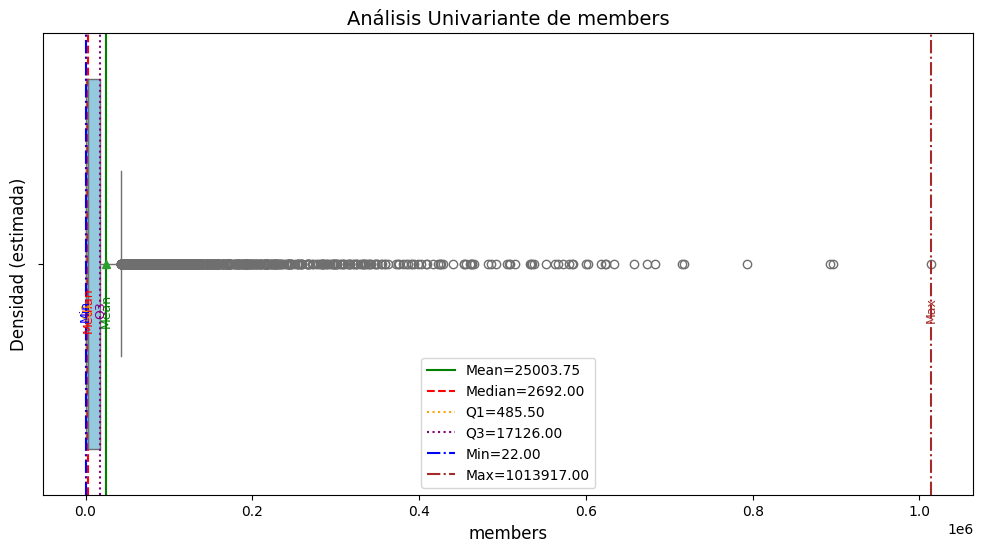

In [105]:
eda=Eda()
eda.analisis_univariante(df_unido,'members')

Interpretación:

La distribución está altamente sesgada hacia la derecha debido a la presencia de un número pequeño de elementos con muchísimos miembros. La mayoría de los datos tienen un número de miembros relativamente bajo (por debajo de 2,691.50), pero los outliers extremos influyen en la media.

In [106]:
eda=Eda()
eda.outliers(df_unido,'members')

      anime_id                                              Title  \
5         5525                                           07-Ghost   
11        6682                                             11eyes   
34       31646                                    3-gatsu no Lion   
50       32998                                            91 Days   
62          50                              Aa! Megami-sama! (TV)   
...        ...                                                ...   
7882     14075                                 Zetsuen no Tempest   
7890     16005  Zettai Karen Children: The Unlimited - Hyoubu ...   
7909      5300                            Zoku Natsume Yuujinchou   
7911      3228                      Zoku Sayonara Zetsubou Sensei   
7913      2404                                        Zombie-Loan   

                                 nombre_normalizado Type  \
5                                           07ghost   TV   
11                                           11eyes

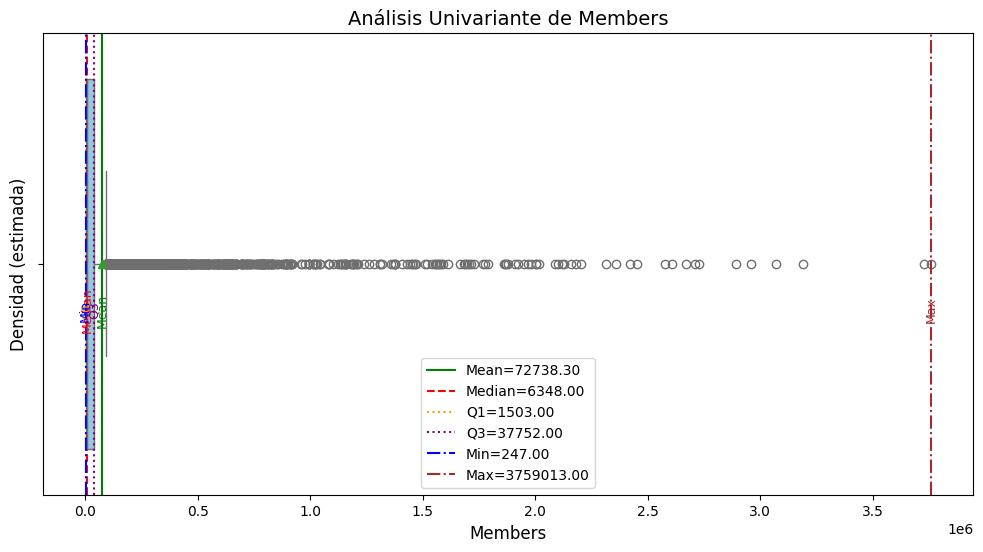

In [107]:
eda=Eda()
eda.analisis_univariante(df_unido,'Members')

- Le ocurre lo mismo que la columna `members`.

In [108]:
eda.outliers(df_unido,'Members')

      anime_id                                              Title  \
5         5525                                           07-Ghost   
11        6682                                             11eyes   
34       31646                                    3-gatsu no Lion   
50       32998                                            91 Days   
62          50                              Aa! Megami-sama! (TV)   
...        ...                                                ...   
7890     16005  Zettai Karen Children: The Unlimited - Hyoubu ...   
7909      5300                            Zoku Natsume Yuujinchou   
7911      3228                      Zoku Sayonara Zetsubou Sensei   
7913      2404                                        Zombie-Loan   
7921     31245  Zutto Mae kara Suki deshita. Kokuhaku Jikkou I...   

                                 nombre_normalizado   Type  \
5                                           07ghost     TV   
11                                           11

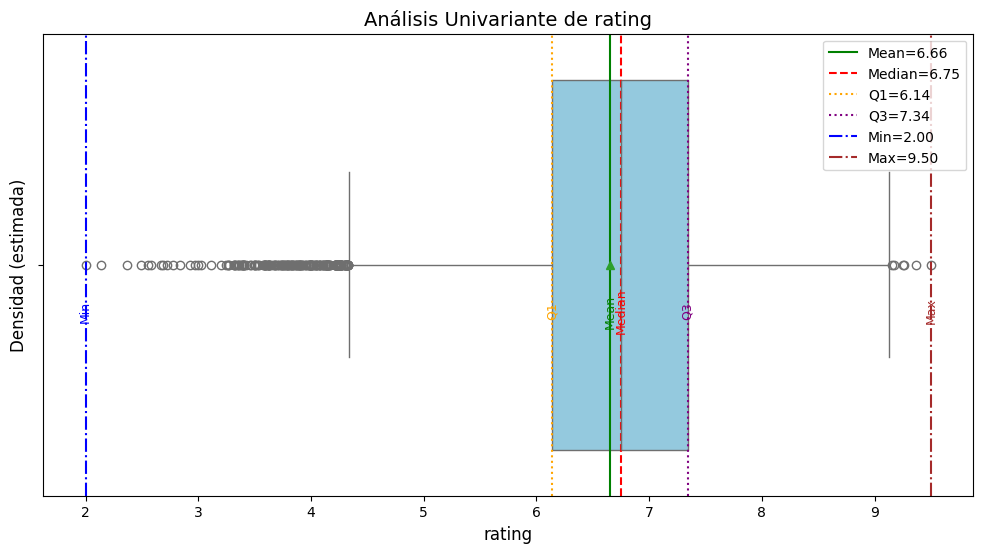

In [109]:
eda=Eda()
eda.analisis_univariante(df_unido,'rating')

Interpretación:

La distribución de rating parece estar centrada en valores moderados, con pocas calificaciones extremadamente bajas o extremadamente altas. Esto puede indicar que la mayoría de los elementos son "aceptables" a "buenos", y las calificaciones extremas son menos comunes.

In [110]:
eda.outliers(df_unido,'rating')

      anime_id                            Title            nombre_normalizado  \
1        29978                              001                           001   
43       30665                           4.Eyes                         4eyes   
47       16812                    77Danui Bimil                  77danuibimil   
89       29980  Adventures in Beauty Wonderland  adventuresinbeautywonderland   
133      32294                         Ai (ONA)                         aiona   
...        ...                              ...                           ...   
7783     23057                         Yukidoke                      yukidoke   
7789     22173                     Yume 10 Yoru                    yume10yoru   
7863     30211                    Zenchuu Maite                  zenchuumaite   
7912     30090                      Zombie Ehon                    zombieehon   
7923     31687                                ◯                             ◯   

       Type             gen

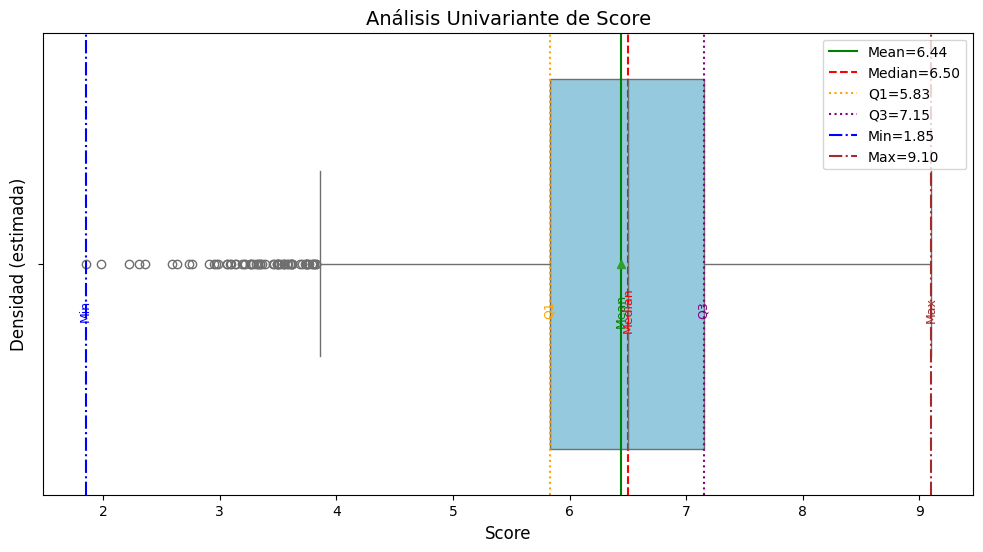

In [111]:
eda=Eda()
eda.analisis_univariante(df_unido,'Score')

- Los datod se parecen a la columna `rating`.

In [112]:
eda.outliers(df_unido,'rating')

      anime_id                            Title            nombre_normalizado  \
1        29978                              001                           001   
43       30665                           4.Eyes                         4eyes   
47       16812                    77Danui Bimil                  77danuibimil   
89       29980  Adventures in Beauty Wonderland  adventuresinbeautywonderland   
133      32294                         Ai (ONA)                         aiona   
...        ...                              ...                           ...   
7783     23057                         Yukidoke                      yukidoke   
7789     22173                     Yume 10 Yoru                    yume10yoru   
7863     30211                    Zenchuu Maite                  zenchuumaite   
7912     30090                      Zombie Ehon                    zombieehon   
7923     31687                                ◯                             ◯   

       Type             gen

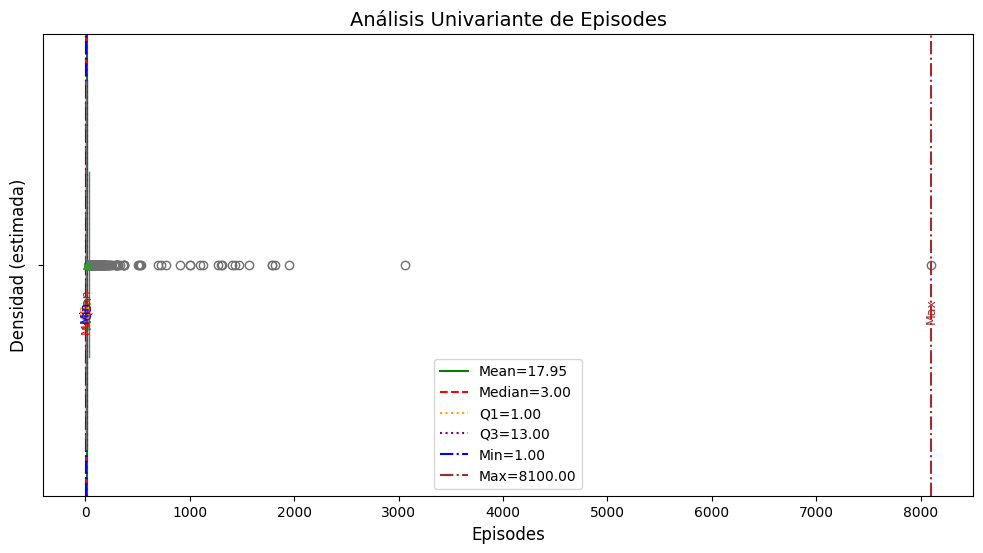

In [113]:
eda=Eda()
eda.analisis_univariante(df_unido,'Episodes')

Interpretación:

La distribución de los episodios está muy sesgada hacia la derecha (positivamente), con una gran cantidad de valores bajos (1 o 3 episodios) y unos pocos valores extremos muy altos que aumentan la media. Esto puede deberse a series muy largas que son excepciones.

In [114]:
eda.outliers(df_unido,'Episodes')

      anime_id                                             Title  \
6        12763                                      0-sen Hayato   
25        5628                                           21 Emon   
33        2467     3 Choume no Tama: Uchi no Tama Shirimasen ka?   
57         303  Aa! Megami-sama!: Chichaitte Koto wa Benri da ne   
96         244     Agatha Christie no Meitantei Poirot to Marple   
...        ...                                               ...   
7901     33339                         Zhongguo Jingqi Xiansheng   
7902     31427                                             Zinba   
7904       763                                             Zoids   
7906       712                                     Zoids Genesis   
7908     11919           Zoku Attacker You! Kin Medal e no Michi   

                           nombre_normalizado Type  \
6                                  0senhayato   TV   
25                                     21emon   TV   
33        3choumenota

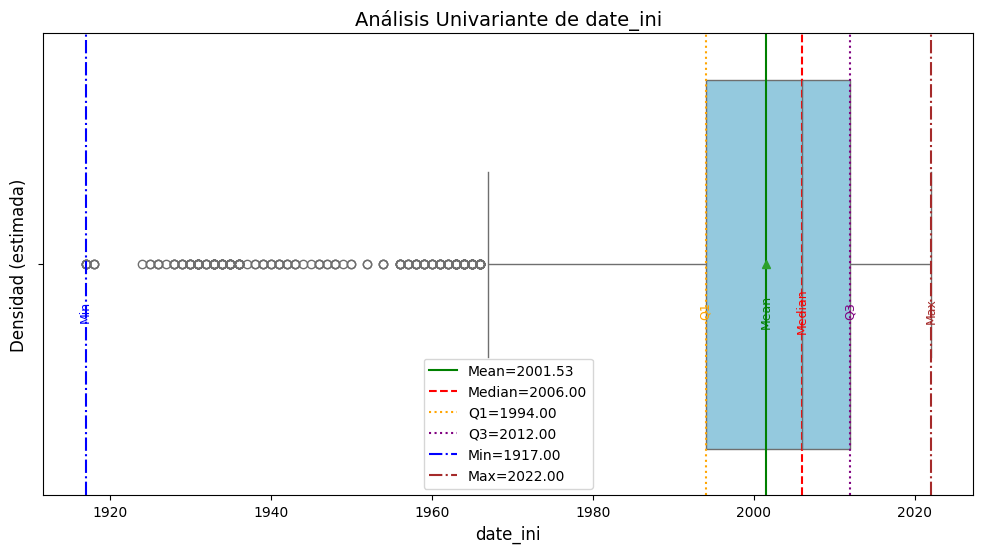

In [115]:
eda=Eda()
eda.analisis_univariante(df_unido,'date_ini')

- Este análisis refleja que los datos están concentrados mayormente entre 1994 y 2012, con pocos registros fuera de ese rango. Los valores atípicos antes de 1970 podrían requerir verificación adicional.

In [116]:
eda.outliers(df_unido,'date_ini')

      anime_id                 Title  nombre_normalizado     Type  \
6        12763          0-sen Hayato          0senhayato       TV   
36        8774      3-tsu no Hanashi       3tsunohanashi  Special   
112      28241      Ahiru Rikusentai     ahirurikusentai    Movie   
113       6535                    Ai                  ai    Movie   
323       7610   Anju to Zushioumaru   anjutozushioumaru    Movie   
...        ...                   ...                 ...      ...   
7742     13087      Youkoso Uchuujin     youkosouchuujin    Movie   
7801     29812          Yumemi Douji         yumemidouji    Movie   
7831     11447             Yuureisen           yuureisen    Movie   
7832     12767          Yuusei Kamen         yuuseikamen       TV   
7833      6448  Yuusei Shounen Papii  yuuseishounenpapii       TV   

                                   genre  Episodes  rating  Score   Rank  \
6                   Historical, Military        38    6.25   5.79   9750   
36                 

### Histogramas

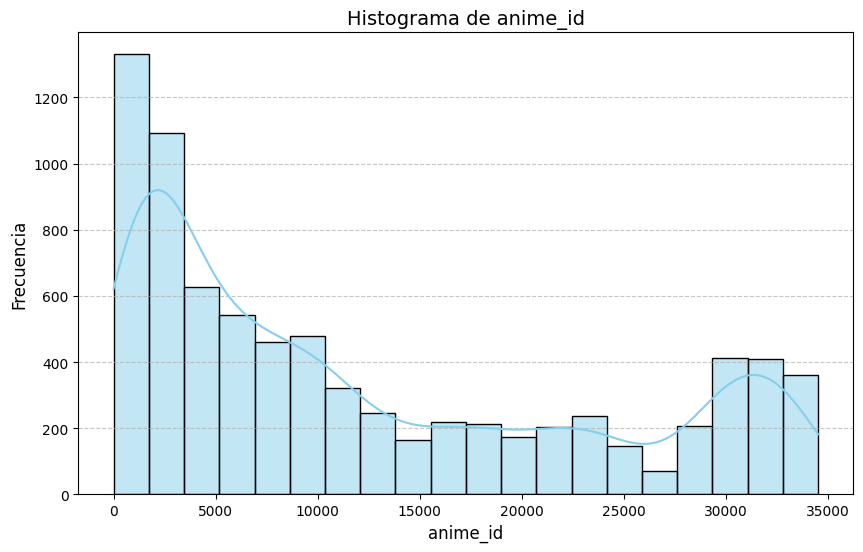

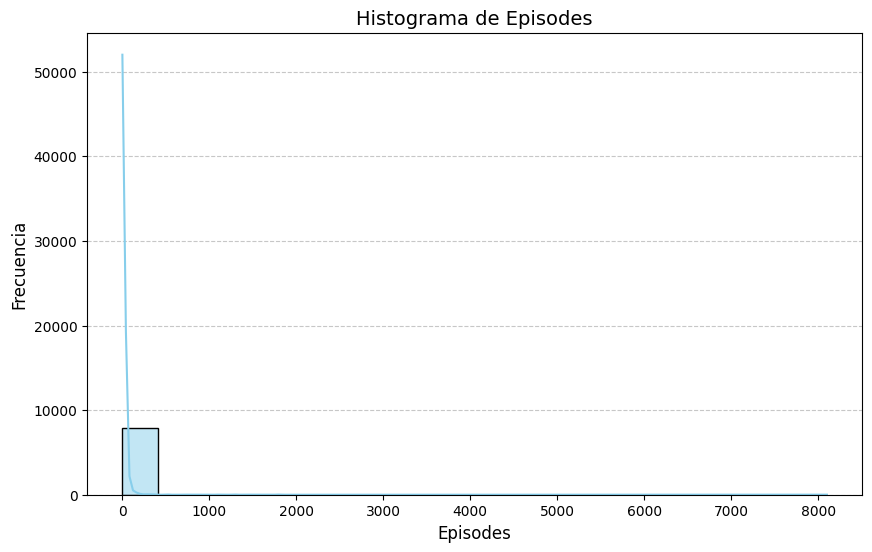

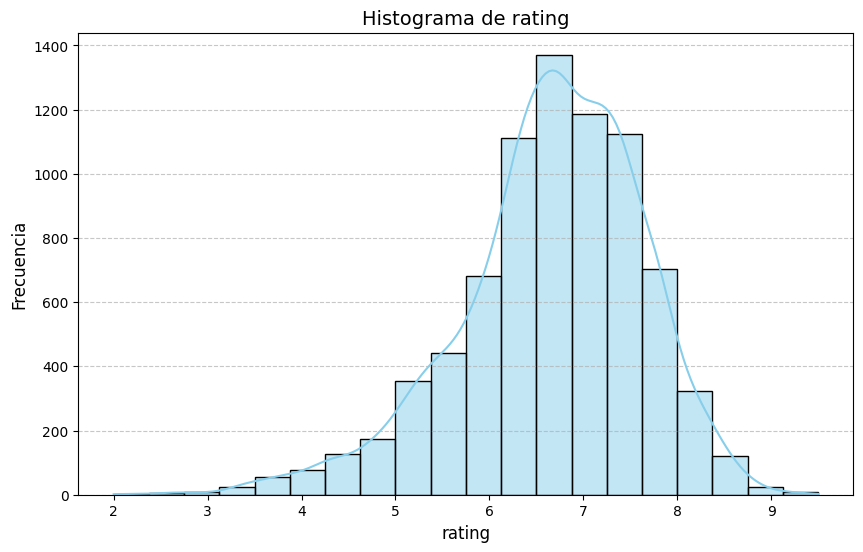

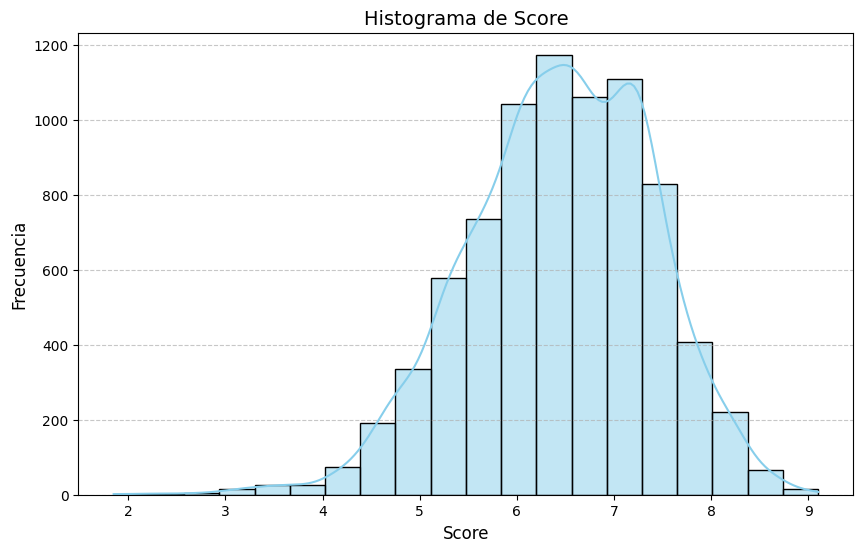

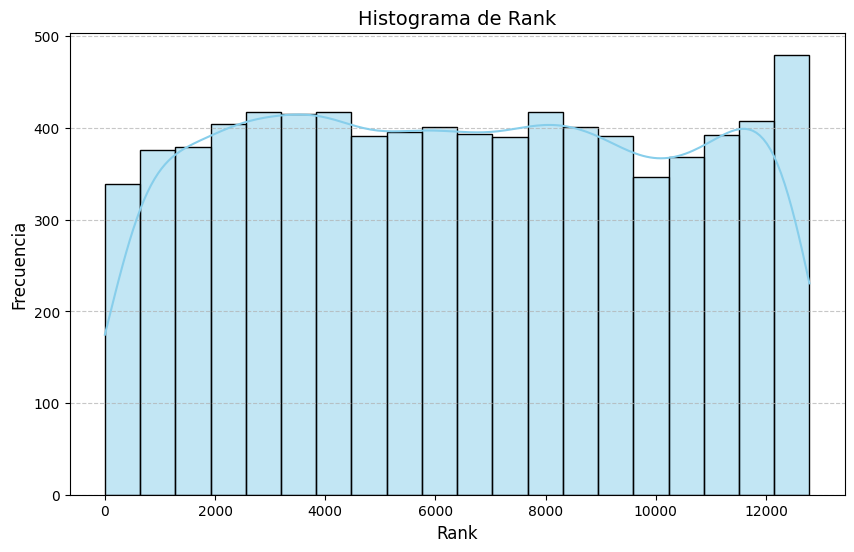

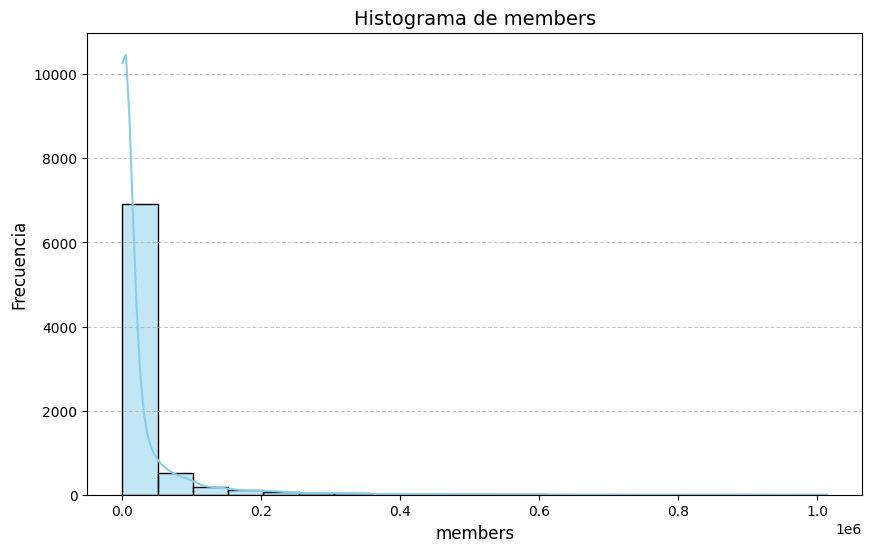

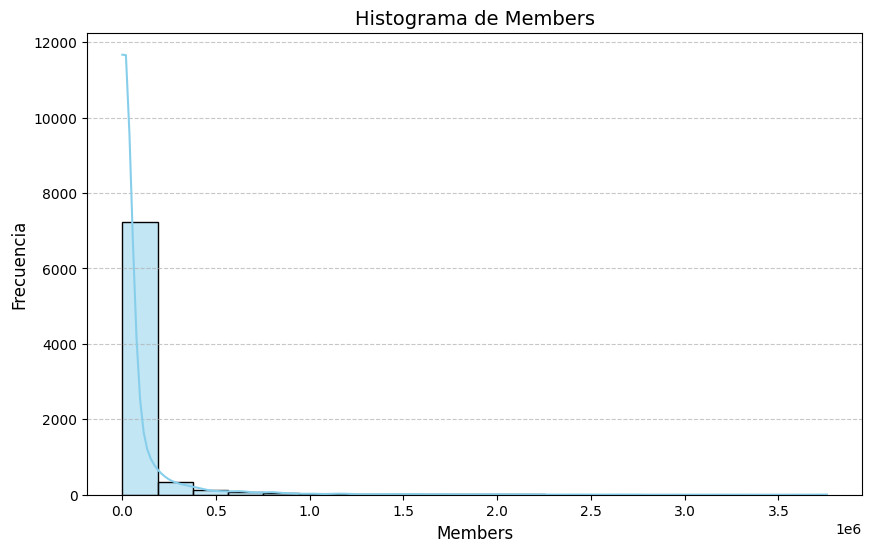

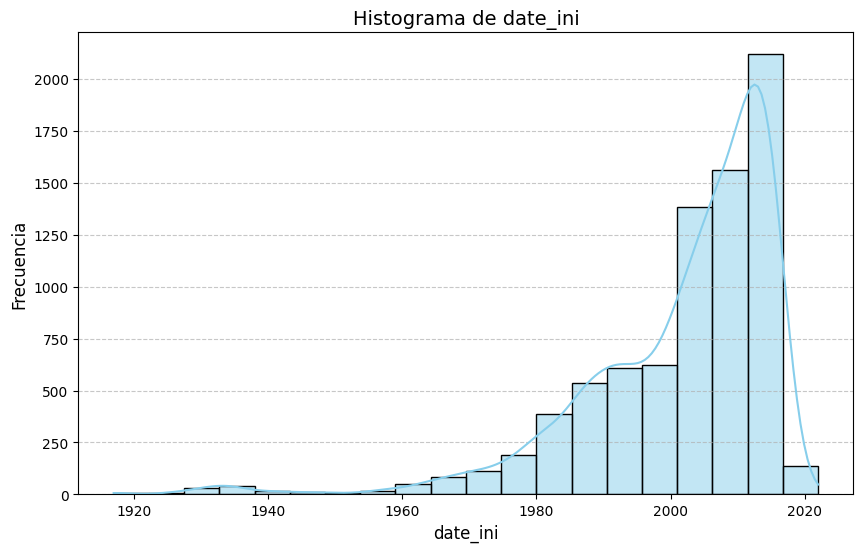

In [117]:
eda.generar_histogramas(df_unido)

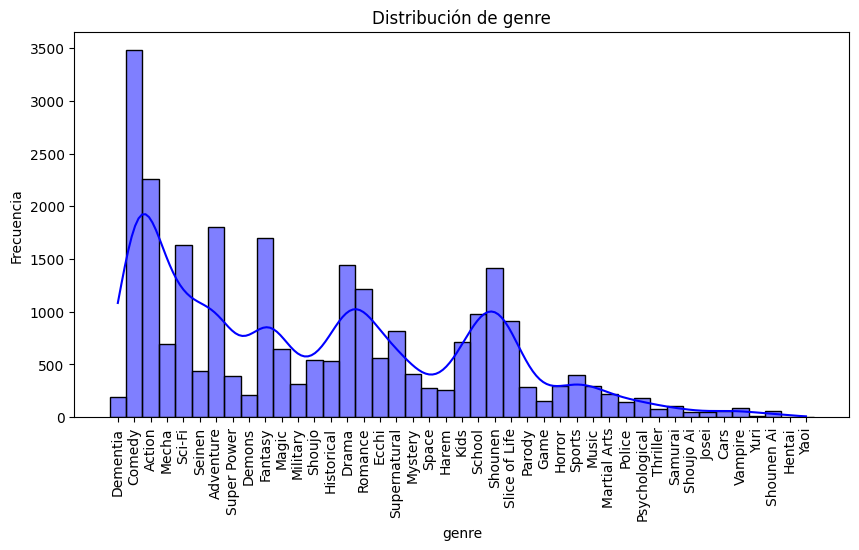

In [118]:
plt.figure(figsize=(10, 5))
sns.histplot(df_1_copia['genre'], kde=True, bins=30, color='blue')
plt.title('Distribución de genre')
plt.xlabel('genre')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)

plt.show()

**Observaciones**

- Episodios: Se observa que la mayoría de los episodios corresponden a números pequeños, mientras que los grupos con una gran cantidad de episodios son pocos.

- Rating/Score: La distribución de rating se asemeja a una distribución normal, con una cola más larga a la derecha, lo que indica que hay menos anime con un rating extremo.

- members/Members: La distribución de membresía se asemeja a una distribución exponencial, con una cola más larga a la derecha, lo que indica que hay menos anime con una gran cantidad de miembros.

- Género: La distribución de géneros muestra que la mayoría de los animes pertenecen a los géneros de Comedy, acción, aventura, Fantasy , Drama y Shounen (BL).

- Año de inicio: La distribución de años de inicio muestra que la mayoría de los animes comenzaron a salir en 1994 (Q1), con pocos animes que comenzaron a salir antes de ese año.

**Calcular la Asimetría y Curtosis:**

Estas métricas ayudan a entender si la distribución es simétrica, sesgada o tiene colas más largas o más cortas que una distribución normal.

In [119]:
df_unido.columns

Index(['anime_id', 'Title', 'nombre_normalizado', 'Type', 'genre', 'Episodes',
       'rating', 'Score', 'Rank', 'members', 'Members', 'Aired', 'season',
       'date_ini', 'page_url', 'image_url', 'members_cuartil'],
      dtype='object')

In [120]:
skewness = df_unido['Episodes'].skew()  # Asimetría
kurtosis = df_unido['Episodes'].kurt()  # Curtosis
print(f'Asimetría de Episodes: {skewness}')
print(f'Curtosis de Episodes: {kurtosis}')

Asimetría de Episodes: 44.46457631337391
Curtosis de Episodes: 2710.0230388921777


Asimetría (skewness) es:

Positiva: La distribución está sesgada a la derecha (cola larga a la derecha).

Curtosis (kurtosis) es: Mayor a 3: Tiene colas más pesadas que la normal (leptocúrtica).

El histograma confirmará el sesgo.

In [121]:
skewness = df_unido['rating'].skew()  # Asimetría
kurtosis = df_unido['rating'].kurt()  # Curtosis
print(f'Asimetría de rating: {skewness}')
print(f'Curtosis de ranting: {kurtosis}')

Asimetría de rating: -0.6945081256151749
Curtosis de ranting: 0.8405242045402184


Asimetría (skewness) es: 

Cerca de 0: La distribución es simétrica.

Curtosis (kurtosis) es: Menor a 3: Tiene colas más ligeras que la normal (platicúrtica)

In [122]:
skewness = df_unido['Score'].skew()  # Asimetría
kurtosis = df_unido['Score'].kurt()  # Curtosis
print(f'Asimetría de Score: {skewness}')
print(f'Curtosis de Score: {kurtosis}')

Asimetría de Score: -0.3709188020589071
Curtosis de Score: 0.2732825312639311


In [123]:
skewness = df_unido['members'].skew()  # Asimetría
kurtosis = df_unido['members'].kurt()  # Curtosis
print(f'Asimetría de members: {skewness}')
print(f'Curtosis de members: {kurtosis}')

Asimetría de members: 5.606810535077989
Curtosis de members: 43.7994605601023


Asimetría (skewness) es:

Positiva: La distribución está sesgada a la derecha (cola larga a la derecha).

Curtosis (kurtosis) es: Mayor a 3: Tiene colas más pesadas que la normal (leptocúrtica).

In [124]:
skewness = df_unido['date_ini'].skew()  # Asimetría
kurtosis = df_unido['date_ini'].kurt()  # Curtosis
print(f'Asimetría de date_ini: {skewness}')
print(f'Curtosis de date_ini: {kurtosis}')

Asimetría de date_ini: -1.9597176177010638
Curtosis de date_ini: 5.535844170588768


Asimetría (skewness) es:

Negativa: La distribución está sesgada a la izquierda (cola larga a la izquierda).

Curtosis (kurtosis) es: Mayor a 3: Tiene colas más pesadas que la normal (leptocúrtica).

**Prueda de Normalidad**

In [125]:
from scipy.stats import shapiro

stat, p = shapiro(df_unido['rating'])
print(f'Estadístico de Shapiro: {stat}, p-valor: {p}')
if p > 0.05:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos NO siguen una distribución normal.")

Estadístico de Shapiro: 0.9740380447713348, p-valor: 1.400809180224744e-35
Los datos NO siguen una distribución normal.


c:\Users\denis\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7923.
  res = hypotest_fun_out(*samples, **kwds)


In [126]:
from scipy.stats import shapiro

stat, p = shapiro(df_unido['Score'])
print(f'Estadístico de Shapiro: {stat}, p-valor: {p}')
if p > 0.05:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos NO siguen una distribución normal.")

Estadístico de Shapiro: 0.9915861771751944, p-valor: 2.7986408250701923e-21
Los datos NO siguen una distribución normal.


In [127]:
from scipy.stats import shapiro

stat, p = shapiro(df_unido['members'])
print(f'Estadístico de Shapiro: {stat}, p-valor: {p}')
if p > 0.05:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos NO siguen una distribución normal.")

Estadístico de Shapiro: 0.40647368096309, p-valor: 1.177840423652122e-95
Los datos NO siguen una distribución normal.


In [128]:
from scipy.stats import shapiro

stat, p = shapiro(df_unido['Members'])
print(f'Estadístico de Shapiro: {stat}, p-valor: {p}')
if p > 0.05:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos NO siguen una distribución normal.")

Estadístico de Shapiro: 0.3215630987352105, p-valor: 6.855520352474488e-99
Los datos NO siguen una distribución normal.


In [129]:
from scipy.stats import shapiro

stat, p = shapiro(df_unido['Episodes'])
print(f'Estadístico de Shapiro: {stat}, p-valor: {p}')
if p > 0.05:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos NO siguen una distribución normal.")

Estadístico de Shapiro: 0.07291392483298798, p-valor: 1.1687068838117803e-106
Los datos NO siguen una distribución normal.


In [130]:
from scipy.stats import shapiro

stat, p = shapiro(df_unido['date_ini'])
print(f'Estadístico de Shapiro: {stat}, p-valor: {p}')
if p > 0.05:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos NO siguen una distribución normal.")

Estadístico de Shapiro: 0.8227208328526798, p-valor: 6.62890969487799e-69
Los datos NO siguen una distribución normal.


**Observacion de las pruebas de Shapiron**

Todos los datos NO siguen una distribución normal, lo que indica que hay datos que no se comportan como una distribución normal. Esto puede afectar la interpretación de los resultados de estadísticas como la media, la mediana y la varianza.

**Conteo**

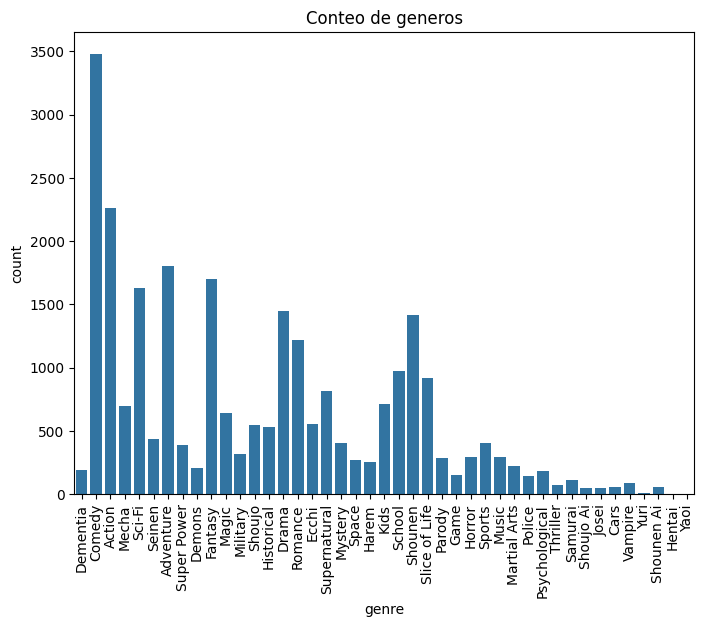

Conteo de valores:
genre
Comedy           3478
Action           2262
Adventure        1800
Fantasy          1702
Sci-Fi           1632
Drama            1446
Shounen          1418
Romance          1217
School            974
Slice of Life     914
Supernatural      815
Kids              714
Mecha             698
Magic             643
Ecchi             556
Shoujo            543
Historical        531
Seinen            439
Mystery           406
Sports            401
Super Power       386
Military          315
Music             297
Horror            292
Parody            289
Space             273
Harem             256
Martial Arts      221
Demons            206
Dementia          192
Psychological     185
Game              152
Police            142
Samurai           110
Vampire            89
Thriller           74
Shounen Ai         60
Cars               57
Shoujo Ai          50
Josei              45
Yuri                9
Hentai              3
Yaoi                3
Name: count, dtype: int64
Por

In [131]:
conteo = df_1_copia['genre'].value_counts()
porcentaje = df_1_copia['genre'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6)) 
sns.countplot(x='genre', data=df_1_copia) 
plt.title('Conteo de generos') 
# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)
plt.show() 

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)

**Observaciones**

- Lista de los generos con mayor repeticiones:

1. Comedy           3478
2. Action           2262
3. Adventure        1800
4. Fantasy          1702
5. Sci-Fi           1632
6. Drama            1446
7. Shounen          1418
8. Romance          1217

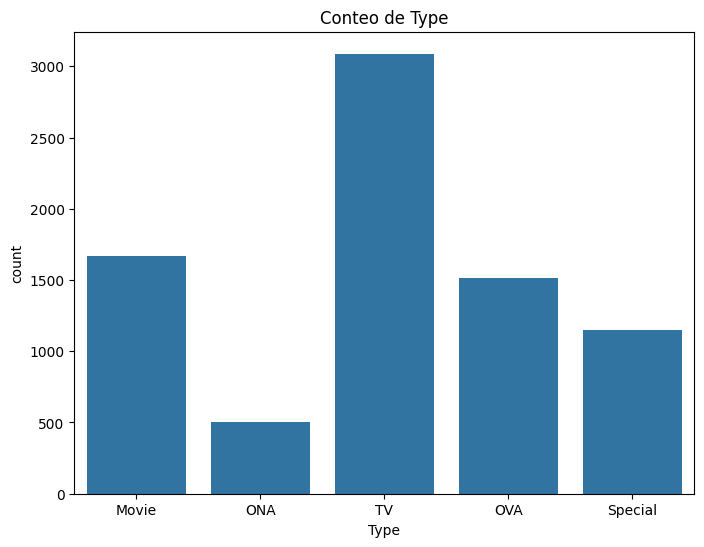

Conteo de valores:
Type
TV         3088
Movie      1665
OVA        1515
Special    1150
ONA         505
Name: count, dtype: int64
Porcentaje de valores:
Type
TV         38.975136
Movie      21.014767
OVA        19.121545
Special    14.514704
ONA         6.373848
Name: proportion, dtype: float64


In [132]:
conteo = df_unido['Type'].value_counts()
porcentaje = df_unido['Type'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6)) 
sns.countplot(x='Type', data=df_unido) 
plt.title('Conteo de Type') 
plt.show() 

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)

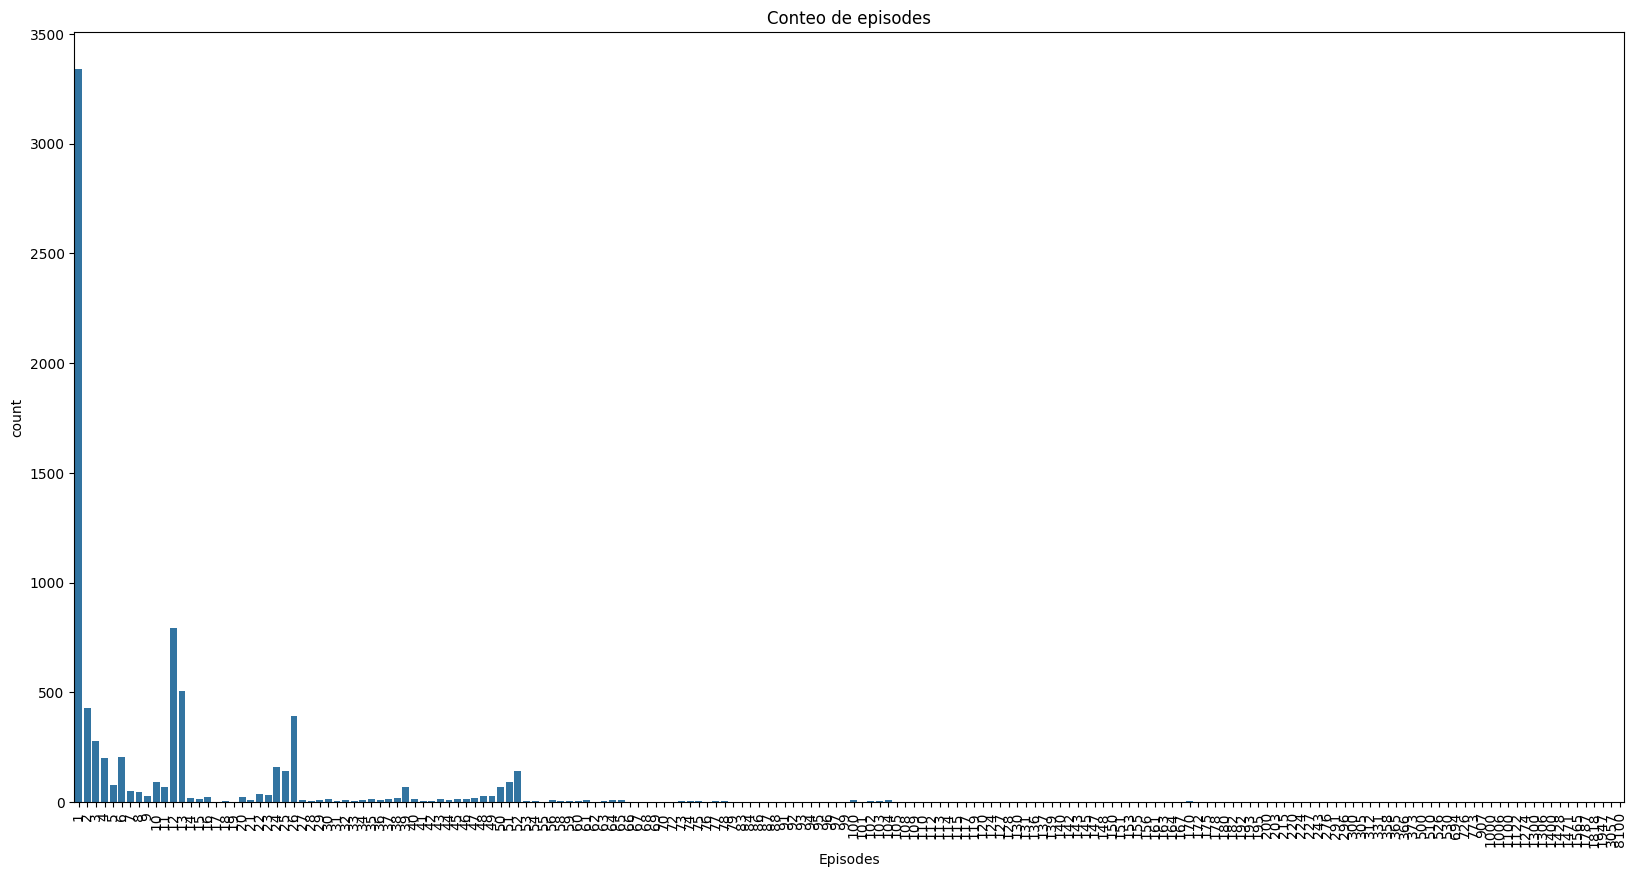

Conteo de valores:
Episodes
1      3341
12      796
13      505
2       429
26      392
       ... 
530       1
124       1
224       1
180       1
215       1
Name: count, Length: 180, dtype: int64
Porcentaje de valores:
Episodes
1      42.168371
12     10.046699
13      6.373848
2       5.414616
26      4.947621
         ...    
530     0.012621
124     0.012621
224     0.012621
180     0.012621
215     0.012621
Name: proportion, Length: 180, dtype: float64


In [133]:
conteo = df_unido['Episodes'].value_counts()
porcentaje = df_unido['Episodes'].value_counts(normalize=True) * 100

plt.figure(figsize=(20, 10)) 
sns.countplot(x='Episodes', data=df_unido) 
plt.title('Conteo de episodes')
# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90) 
plt.show() 

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)

In [134]:
df_unido.columns

Index(['anime_id', 'Title', 'nombre_normalizado', 'Type', 'genre', 'Episodes',
       'rating', 'Score', 'Rank', 'members', 'Members', 'Aired', 'season',
       'date_ini', 'page_url', 'image_url', 'members_cuartil'],
      dtype='object')

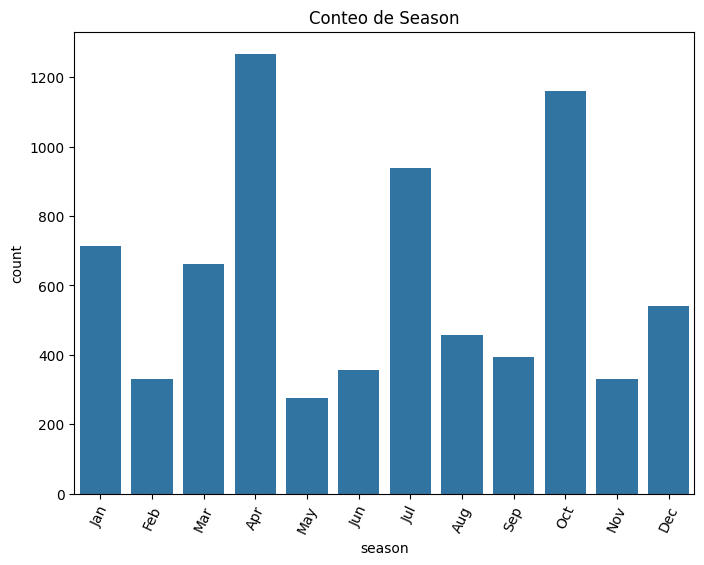

Conteo de valores:
season
Apr    1268
Oct    1161
Jul     937
Jan     714
Mar     661
Dec     540
Aug     457
Sep     393
Jun     355
Feb     330
Nov     330
May     277
Name: count, dtype: int64
Porcentaje de valores:
season
Apr    17.082042
Oct    15.640577
Jul    12.622929
Jan     9.618753
Mar     8.904755
Dec     7.274687
Aug     6.156540
Sep     5.294355
Jun     4.782433
Feb     4.445642
Nov     4.445642
May     3.731645
Name: proportion, dtype: float64


In [135]:

# Filtrar los valores relevantes
valores_relevantes = ['Apr', 'Oct', 'Jul', 'Jan', 'Mar', 'Dec', 'Aug', 'Sep', 'Jun', 'Feb', 'Nov', 'May']
df_filtrado = df_unido[df_unido['season'].isin(valores_relevantes)]

# Definir el orden de los meses
orden_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Contar los valores
conteo = df_filtrado['season'].value_counts()
porcentaje = df_filtrado['season'].value_counts(normalize=True) * 100

# Graficar el conteo con seaborn, especificando el orden de los meses
plt.figure(figsize=(8, 6))
sns.countplot(x='season', data=df_filtrado, order=orden_meses) 
plt.title('Conteo de Season')
plt.xticks(rotation=65)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()

# Mostrar el conteo y porcentaje
print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)

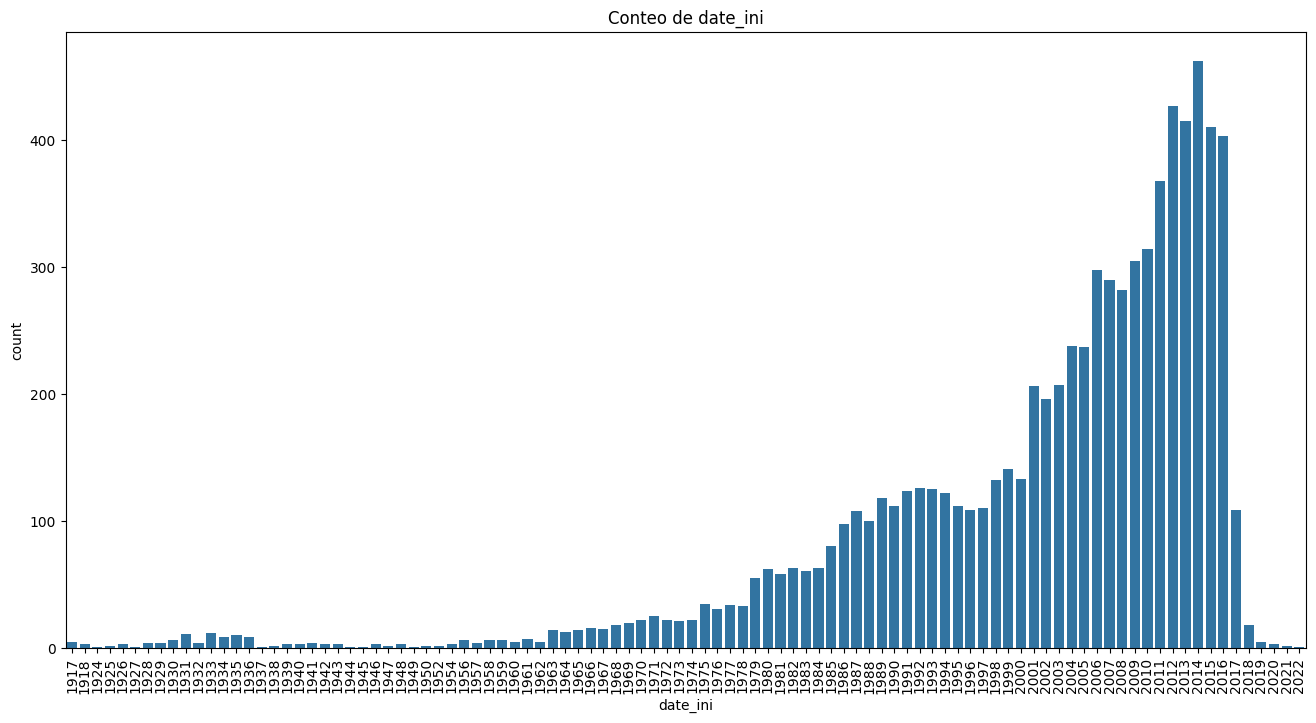

Conteo de valores:
date_ini
2014    462
2012    427
2013    415
2015    410
2016    403
       ... 
1937      1
1927      1
1945      1
2022      1
1924      1
Name: count, Length: 98, dtype: int64
Porcentaje de valores:
date_ini
2014    5.831125
2012    5.389373
2013    5.237915
2015    5.174808
2016    5.086457
          ...   
1937    0.012621
1927    0.012621
1945    0.012621
2022    0.012621
1924    0.012621
Name: proportion, Length: 98, dtype: float64


In [136]:
conteo = df_unido['date_ini'].value_counts()
porcentaje = df_unido['date_ini'].value_counts(normalize=True) * 100

plt.figure(figsize=(16, 8)) 
sns.countplot(x='date_ini', data=df_unido) 
plt.title('Conteo de date_ini')
# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90) 
plt.show() 

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)

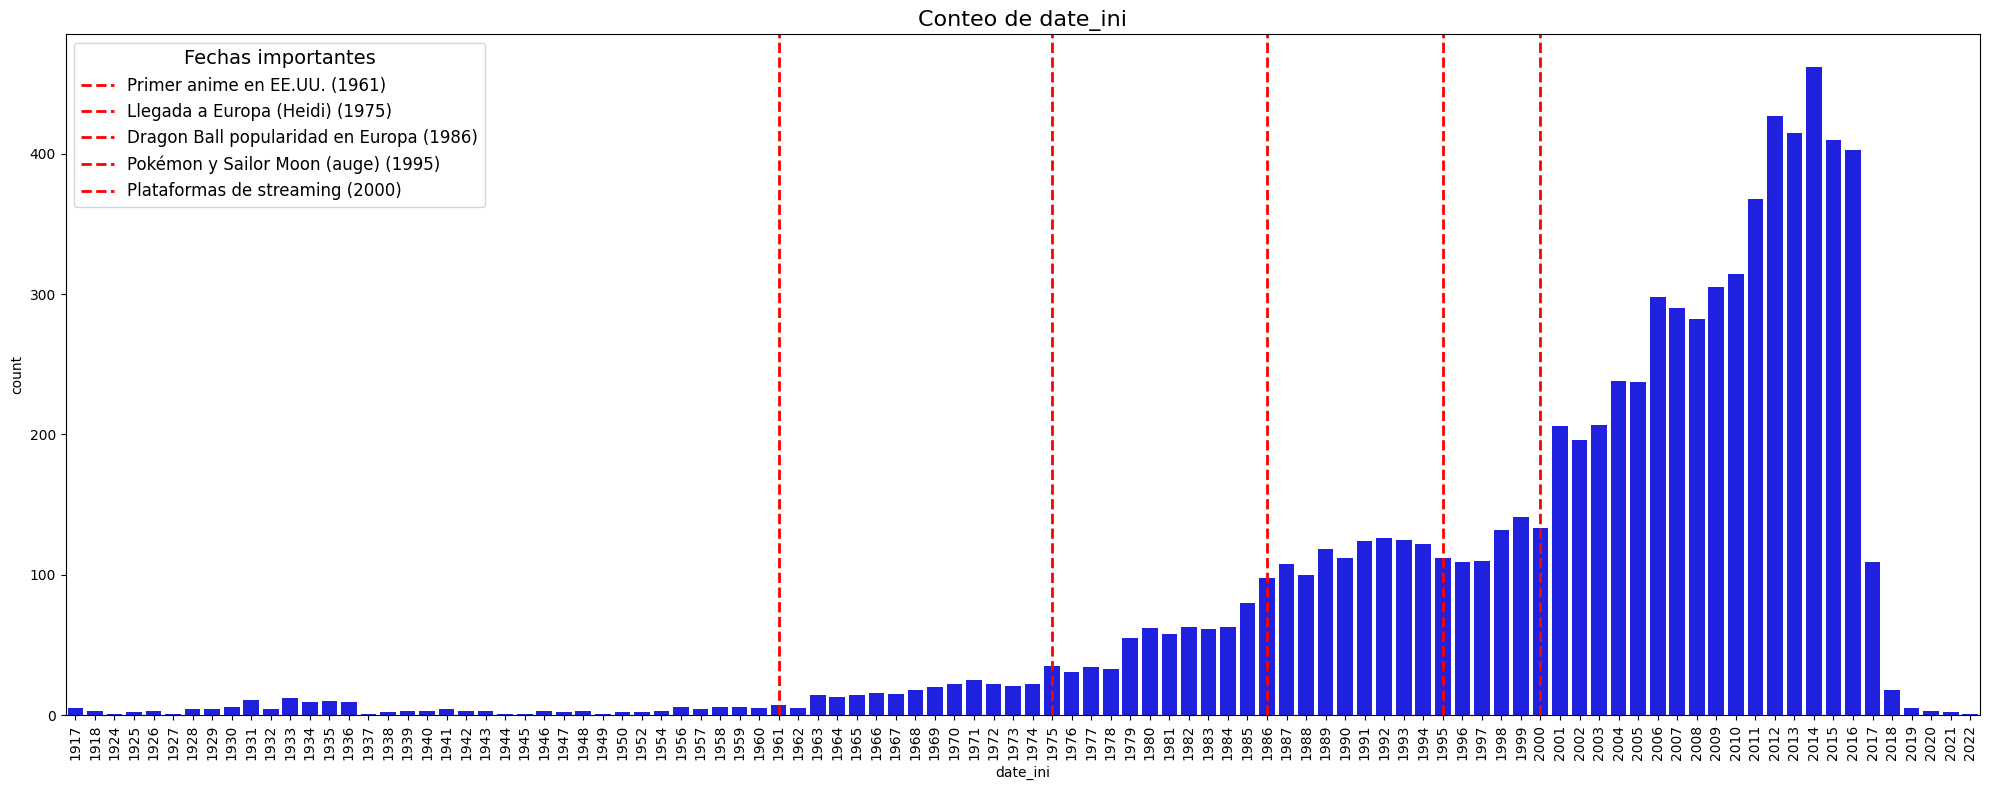

In [137]:
# Crear la figura
plt.figure(figsize=(20, 8))  # Ampliar el tamaño de la gráfica
sns.countplot(x='date_ini', data=df_unido, color="blue", order=sorted(df_unido['date_ini'].unique()))

# Título de la gráfica
plt.title('Conteo de date_ini', fontsize=16)

# Rotar etiquetas para mejorar la legibilidad
plt.xticks(rotation=90, fontsize=10)

# Fechas históricas relevantes
fechas_relevantes = {
    "Primer anime en EE.UU.": 1961,
    "Llegada a Europa (Heidi)": 1975,
    "Dragon Ball popularidad en Europa": 1986,
    "Pokémon y Sailor Moon (auge)": 1995,
    "Plataformas de streaming": 2000
}

# Añadir líneas verticales y resaltar las fechas importantes
for evento, year in fechas_relevantes.items():
    plt.axvline(x=sorted(df_unido['date_ini'].unique()).index(year),  # Ubicación de la línea en el eje X
                color='red', linestyle='--', linewidth=2, label=f'{evento} ({year})')

# Añadir la leyenda explicativa
plt.legend(loc='upper left', fontsize=12, title="Fechas importantes", title_fontsize=14)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [138]:
df_unido['rating'].max()

np.float64(9.5)

In [139]:
df_unido[df_unido['rating']==9.5]

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url,members_cuartil
4669,23005,Mogura no Motoro,moguranomotoro,Movie,Slice of Life,1,9.5,5.56,10618,62,466,Jul 1962 - Jul 1962,Jul,1962,https://myanimelist.net/anime/23005/Mogura_no_...,https://cdn.myanimelist.net/r/100x140/images/a...,Q1


In [140]:
df_unido['Score'].max()

np.float64(9.1)

In [141]:
df_unido[df_unido['Score']==9.1]

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url,members_cuartil
1936,5114,Fullmetal Alchemist: Brotherhood,fullmetalalchemistbrotherhood,TV,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64,9.26,9.1,1,793665,3188280,Apr 2009 - Jul 2010,Apr,2009,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/r/100x140/images/a...,Q4


In [142]:
df_unido['members'].max()

np.int64(1013917)

In [143]:
df_unido[df_unido['members']==1013917]

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url,members_cuartil
1369,1535,Death Note,deathnote,TV,"Mystery, Police, Psychological, Supernatural, ...",37,8.71,8.62,79,1013917,3727021,Oct 2006 - Jun 2007,Oct,2006,https://myanimelist.net/anime/1535/Death_Note,https://cdn.myanimelist.net/r/100x140/images/a...,Q4


In [144]:
df_unido['Members'].max()

np.int64(3759013)

In [145]:
df_unido[df_unido['Members']==3759013]

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url,members_cuartil
6232,16498,Shingeki no Kyojin,shingekinokyojin,TV,"Action, Drama, Fantasy, Shounen, Super Power",25,8.54,8.54,107,896229,3759013,Apr 2013 - Sep 2013,Apr,2013,https://myanimelist.net/anime/16498/Shingeki_n...,https://cdn.myanimelist.net/r/100x140/images/a...,Q4


**7.2.Análisis bivariante**

A continuación se observa la relación entre dos variables, permitiendo  descubrir correlaciones entre variables.

In [146]:
df_unido.head(1)

,anime_id,Title,nombre_normalizado,Type,genre,Episodes,rating,Score,Rank,members,Members,Aired,season,date_ini,page_url,image_url,members_cuartil
0,28761,00:08,0008,Movie,Dementia,1,5.21,4.9,12164,2386,9749,Jun 2014 - Jun 2014,Jun,2014,https://myanimelist.net/anime/28761/00_08,https://cdn.myanimelist.net/r/100x140/images/a...,Q2


In [147]:
df_unido.columns

Index(['anime_id', 'Title', 'nombre_normalizado', 'Type', 'genre', 'Episodes',
       'rating', 'Score', 'Rank', 'members', 'Members', 'Aired', 'season',
       'date_ini', 'page_url', 'image_url', 'members_cuartil'],
      dtype='object')

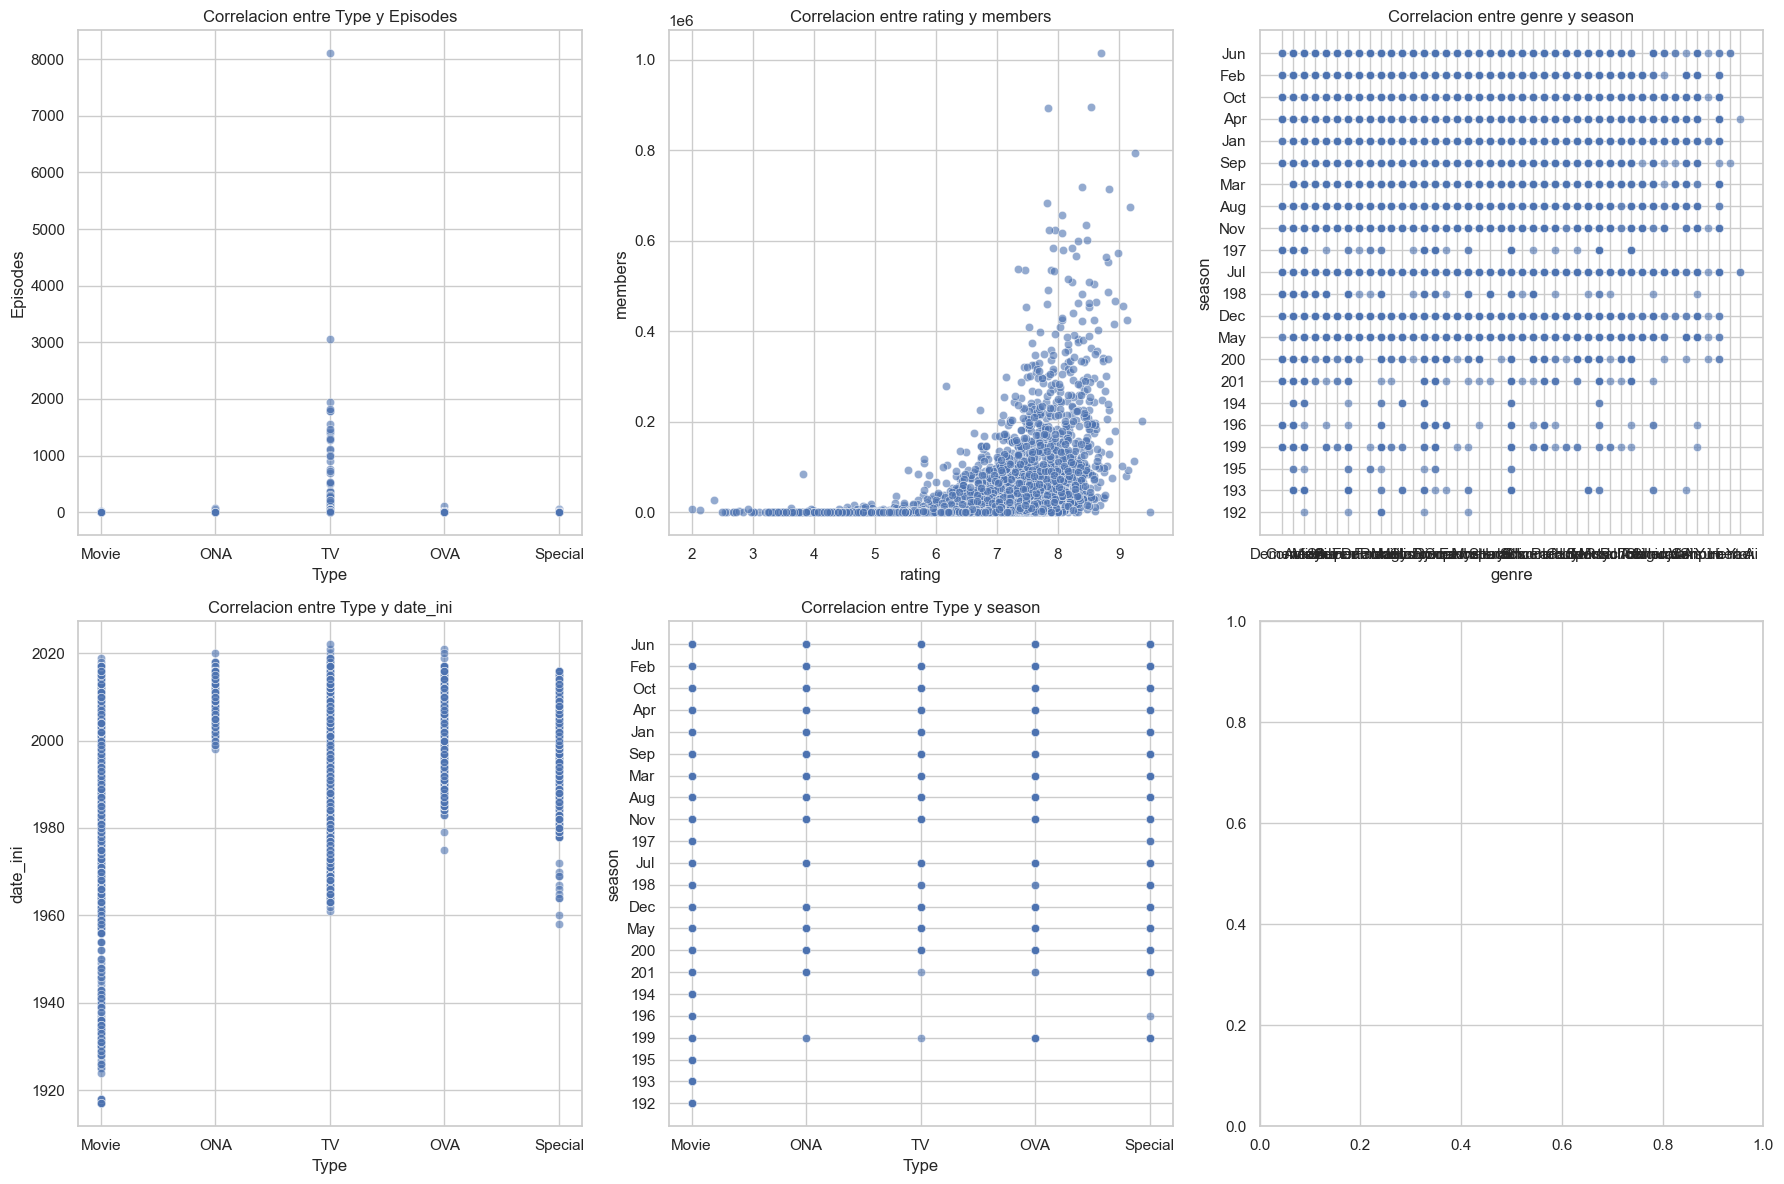

In [148]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.scatterplot(data=df_unido, x='Type', y='Episodes', alpha=0.6, ax=axes[0, 0])
axes[0, 0].set_title('Correlacion entre Type y Episodes')

sns.scatterplot(data=df_unido, x='rating', y='members', alpha=0.6, ax=axes[0, 1])
axes[0, 1].set_title('Correlacion entre rating y members')

sns.scatterplot(data=df_1_copia, x='genre', y='season', alpha=0.6, ax=axes[0, 2])
axes[0, 2].set_title('Correlacion entre genre y season')

sns.scatterplot(data=df_unido, x='Type', y='date_ini', alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Correlacion entre Type y date_ini')

sns.scatterplot(data=df_unido, x='Type', y='season', alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('Correlacion entre Type y season')

plt.tight_layout() 
plt.show()

Conclusiones
Cantidad de Episodios por Tipo de Anime:

El tipo TV es el que presenta la mayor cantidad de episodios en promedio. Esto es consistente con la naturaleza de las series de televisión, que tienden a tener más episodios debido a la emisión continua y la producción más extensa. En contraste, los tipos Movie y OVA suelen tener menos episodios, ya que estos formatos están más enfocados en historias más cortas o independientes.
Relación entre Puntuación y Número de Miembros:

Se observa una tendencia en la que a mayor puntuación, mayor número de miembros. Esto sugiere que los animes que reciben una calificación más alta tienden a atraer a una mayor audiencia. Es una indicación de que los usuarios tienden a unirse a aquellos animes mejor valorados para expresar su apoyo o interesarse por ellos, lo que también podría reflejarse en su popularidad.
Evolución de la Popularidad según el Tipo de Anime:

Los Movies siempre han sido populares a lo largo de los años, con una presencia estable en la base de datos desde sus primeros lanzamientos.
Los TV animes comenzaron a ganar popularidad a partir de los años 1960, coincidiendo con el auge de la televisión en muchos países y la expansión de la industria del anime.
Los OVA (Original Video Animation) comenzaron a surgir y aumentar en popularidad alrededor de la década de 1980, una época en la que la industria del anime comenzó a experimentar una mayor diversificación en los formatos de distribución.
Por último, los ONA (Original Net Animation) ganaron relevancia a partir de 2020, probablemente debido al auge de plataformas de streaming como Netflix, Crunchyroll y otras, que permiten el acceso global a series exclusivas de anime.

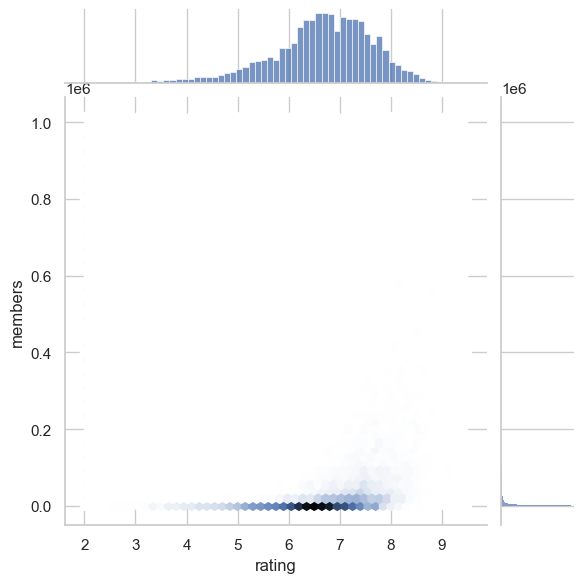

In [149]:
sns.jointplot(data=df_unido, x='rating', y='members', kind='hex');

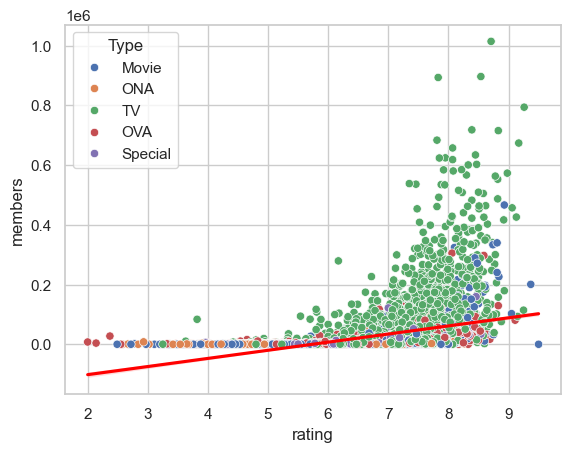

In [150]:
sns.scatterplot(data=df_unido, x='rating', y='members', hue='Type')
sns.regplot(x='rating', y='members', data=df_unido, scatter=False, color='red')

plt.show()

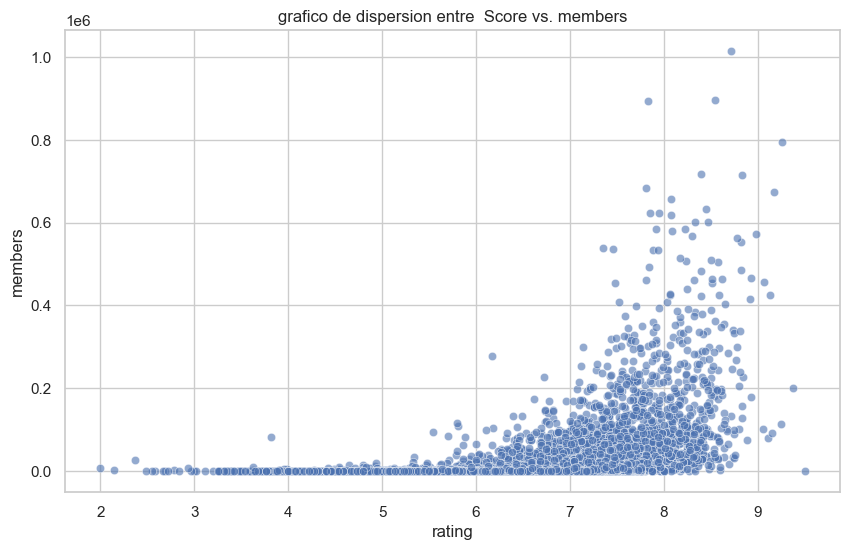

In [151]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_unido, x='rating', y='members', alpha=0.6)
plt.title('grafico de dispersion entre  Score vs. members')
plt.xlabel('rating')
plt.ylabel('members')
plt.show()

Análisis Multivariado

Análisis de Correlación 

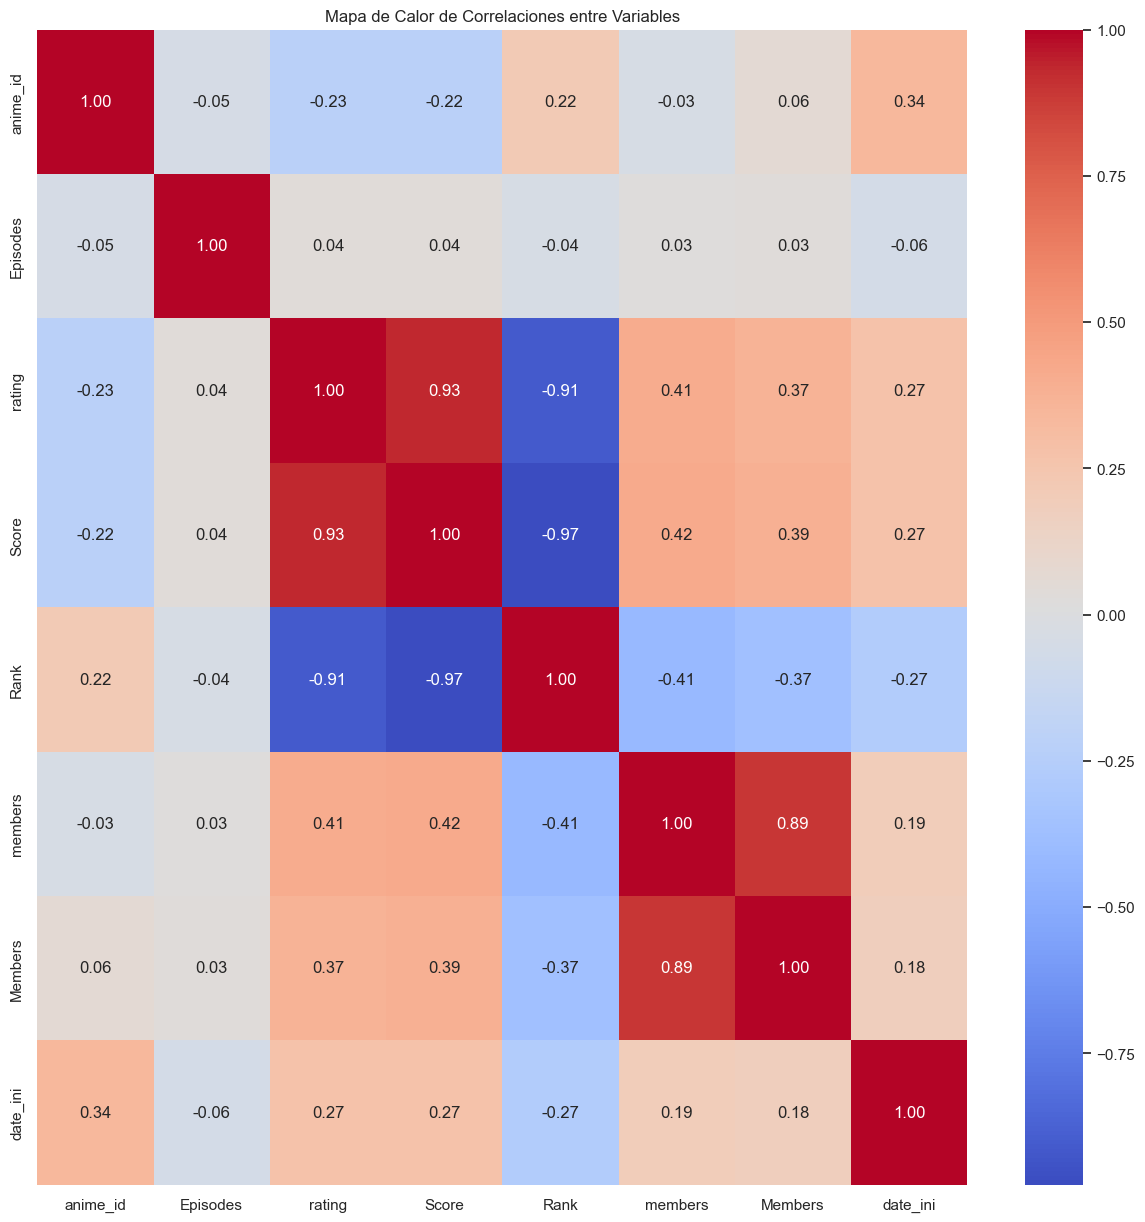

In [152]:
df_numeric = df_unido.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()

In [153]:
# Seleccionar solo las columnas numéricas
df_numerico = df_unido.select_dtypes(include='number')

# Calcular la correlación solo entre las columnas numéricas
correlation_matrix = df_numerico.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

          anime_id  Episodes    rating     Score      Rank   members  \
anime_id  1.000000 -0.046480 -0.225383 -0.219622  0.218584 -0.033726   
Episodes -0.046480  1.000000  0.038748  0.043478 -0.038443  0.025900   
rating   -0.225383  0.038748  1.000000  0.931836 -0.906411  0.407879   
Score    -0.219622  0.043478  0.931836  1.000000 -0.974209  0.418875   
Rank      0.218584 -0.038443 -0.906411 -0.974209  1.000000 -0.413842   
members  -0.033726  0.025900  0.407879  0.418875 -0.413842  1.000000   
Members   0.064108  0.030361  0.370901  0.386591 -0.370234  0.894889   
date_ini  0.339375 -0.062475  0.274014  0.267609 -0.272378  0.191505   

           Members  date_ini  
anime_id  0.064108  0.339375  
Episodes  0.030361 -0.062475  
rating    0.370901  0.274014  
Score     0.386591  0.267609  
Rank     -0.370234 -0.272378  
members   0.894889  0.191505  
Members   1.000000  0.181472  
date_ini  0.181472  1.000000  


La correlación mide la relación lineal entre dos variables, y el valor de la correlación puede variar de -1 a 1:

1 indica una relación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.
-1 indica una relación negativa perfecta: a medida que una variable aumenta, la otra disminuye.
0 indica que no hay relación lineal entre las variables.
Interpretación de algunos resultados clave:
Correlación entre rating y Score (0.93):

Hay una correlación positiva fuerte entre la calificación (rating) y la puntuación (Score). Esto significa que, en general, los animes con una calificación más alta tienden a tener una puntuación también más alta.
Correlación entre Rank y Score (-0.97):

Existe una correlación negativa fuerte entre el Rank (ranking) y la Score. Esto indica que los animes con un ranking más bajo (que son más populares o mejor clasificados) tienden a tener una puntuación más alta.
Correlación entre members y Members (0.89):

Hay una correlación positiva fuerte entre las columnas members y Members. Esto sugiere que las variables son en gran medida redundantes, y podrían representar información similar (posiblemente un error de denominación, ya que parecen referirse al mismo concepto, número de miembros).
Correlación entre Type y rating (0.31):

La correlación entre el tipo de anime (Type) y la calificación (rating) es moderada. Esto implica que el tipo de anime tiene cierta relación con las calificaciones, pero no es una relación fuerte.
Correlación entre date_ini y anime_id (0.34):

Hay una correlación positiva moderada entre el anime_id y la fecha de inicio (date_ini), lo que sugiere que los animes más recientes tienden a tener identificadores más altos.